# Importing all the libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report , r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler , OrdinalEncoder , PowerTransformer, FunctionTransformer , LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer , KNNImputer , IterativeImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 1. Feature Scaling: Standardization & Normalization

**Task:**

Apply both StandardScaler and MinMaxScaler to a dataset. Compare the impact of each scaling method on the performance of a machine learning model (e.g., Logistic Regression or SVM).

**Applying Random Forest without preprocessing**

In [ ]:
df = pd.read_csv('/content/winequality-white.csv', sep=';'); # imp as i used sep attribute for ; seprated values
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2270,7.3,0.19,0.25,1.4,0.051,41.0,107.0,0.99382,3.53,0.66,10.5,7
1691,7.2,0.25,0.28,14.4,0.055,55.0,205.0,0.99860,3.12,0.38,9.0,7
1480,7.2,0.08,0.49,1.3,0.050,18.0,148.0,0.99450,3.46,0.44,10.2,6
1277,7.6,0.31,0.29,10.5,0.040,21.0,145.0,0.99660,3.04,0.35,9.4,5
2379,6.4,0.27,0.19,2.0,0.084,21.0,191.0,0.99516,3.49,0.63,9.6,4


In [ ]:
X = df.drop(columns=['quality'])
y = df['quality']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3, random_state=42)

In [ ]:
# model = RandomForestClassifier(random_state=42)
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))

In [ ]:
evaluate_model(y_test, y_pred)

Accuracy: 0.5176870748299319


**Applying Random Forest with preprocessing**

In [ ]:
std_scalar = StandardScaler() # Using standardScalar
min_max = MinMaxScaler() # using Min max Scalar

In [ ]:
X_train_std = std_scalar.fit_transform(X_train) # fit and transform training data using std_scalar
X_test_std = std_scalar.transform(X_test) # tranform testing data using std_scalar

In [ ]:
X_train_mm = min_max.fit_transform(X_train) # fit and transform training data using min_max_scalar
X_test_mm = min_max.transform(X_test)  # tranform testing data using min_max_scalar

In [ ]:
model_std = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs') # applying Logistic Regression on std_scalar data
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)

In [ ]:
model_mm = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs') # applying LogisticRegression on min_max scalar data
model_mm.fit(X_train_mm , y_train)
y_pred_mm = model_mm.predict(X_test_mm)

In [ ]:
evaluate_model(y_test , y_pred_std) # StandardScalar has improved the model

Accuracy: 0.5401360544217687


In [ ]:
evaluate_model(y_test , y_pred_mm) # Min Max Scalar has also improved the model

Accuracy: 0.5360544217687074


# 2. Encoding Categorical Data: One-Hot & Ordinal Encoding

**Task:**

For a dataset with both nominal and ordinal categorical variables, apply OneHotEncoder and OrdinalEncoder appropriately. Evaluate the impact on model performance using a classification algorithm.

In [ ]:
df = pd.read_csv('/content/train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df.drop(columns=['Cabin'])

In [ ]:
df.set_index('PassengerId' , inplace=True)

In [ ]:
X = df.drop(columns=['Survived' , 'Name'])
y = df['Survived']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [ ]:
numerical_transformer = Pipeline([
  ('imputer' , SimpleImputer(strategy='median')),
  ('scaler' , StandardScaler())
])

categorical_transformer_one_hot = Pipeline([
    ('imputer' , SimpleImputer(strategy='most_frequent')),
    ('encoder' , OneHotEncoder(handle_unknown='ignore'))
])

categorical_transformer_ordinal = Pipeline([
    ('imputer' , SimpleImputer(strategy='most_frequent')),
    ('encoder' , OrdinalEncoder())
])

In [ ]:
transformer_with_onehot = ColumnTransformer([
    ('numerical' , numerical_transformer , ['Age' , 'Fare']),
    ('categorical_onehot' , categorical_transformer_one_hot , ['Sex' , 'Embarked']),
])

transformer_with_ordinal = ColumnTransformer([
    ('numerical' , numerical_transformer , ['Age' , 'Fare']),
    ('categorical_ordinal' , categorical_transformer_ordinal , ['Sex' , 'Embarked']),
])

In [ ]:
pipeline_with_one_hot_transformer = Pipeline([
    ('transformer_with_onehot' , transformer_with_onehot),
    ('model_with_onehot' , LogisticRegression(max_iter=1000))
])

pipeline_with_ordinal_transformer = Pipeline([
    ('transformer_ordinal' , transformer_with_ordinal),
    ('model_with_ordinal' , LogisticRegression(max_iter=1000))
])

In [ ]:
pipeline_with_one_hot_transformer.fit(X_train , y_train)

y_pred = pipeline_with_one_hot_transformer.predict(X_test)

accuracy_score_with_onehot = accuracy_score(y_test , y_pred)
print(accuracy_score_with_onehot)

0.7798507462686567


In [ ]:
pipeline_with_ordinal_transformer.fit(X_train , y_train)

y_pred = pipeline_with_ordinal_transformer.predict(X_test)

accuracy_score_with_ordinal = accuracy_score(y_test , y_pred)
print(accuracy_score_with_ordinal)

0.7798507462686567


Steps :
1. Build differnent pipeline for numerical data and categorical data
2. use that pipeline in column tranformers
3. lastly build a main pipeline with or without model
4. then train and predict target values

# 3. FunctionTransformer & PowerTransformer

**Task:**

Transform skewed numerical features using PowerTransformer. Then, apply a FunctionTransformer to create polynomial features. Assess the effect on model performance.

In [ ]:
df = pd.read_csv('/content/housing.csv')
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13608,-117.25,34.14,19.0,5163.0,1229.0,2680.0,1141.0,2.2482,114500.0,INLAND
10755,-117.89,33.61,45.0,1883.0,419.0,653.0,328.0,4.2222,500001.0,<1H OCEAN
4213,-118.27,34.14,29.0,3768.0,1211.0,2320.0,1030.0,2.7685,204500.0,<1H OCEAN
16422,-121.23,37.87,49.0,98.0,24.0,59.0,26.0,3.6500,162500.0,INLAND
16701,-120.60,35.10,16.0,3290.0,686.0,1497.0,655.0,2.6875,178200.0,<1H OCEAN


In [ ]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [ ]:
X = df.drop(columns=['median_house_value' , 'ocean_proximity'])
y = df['median_house_value']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.6299559360511694


In [ ]:
numerical_col = []

for col in X_train.columns:
  if X_train[col].dtype == 'float64':
    numerical_col.append(col)

This is the skewness of the longitude : -0.2978012079524362



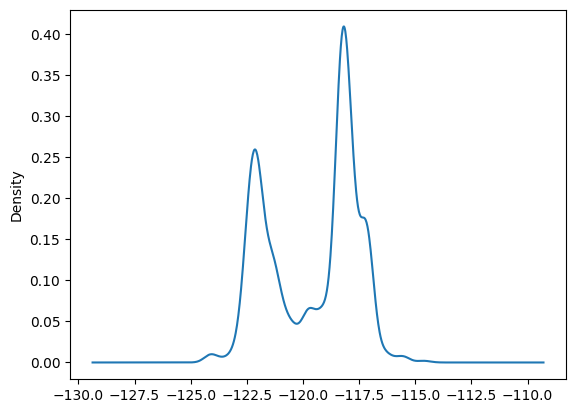

This is the skewness of the latitude : 0.46595300370997006



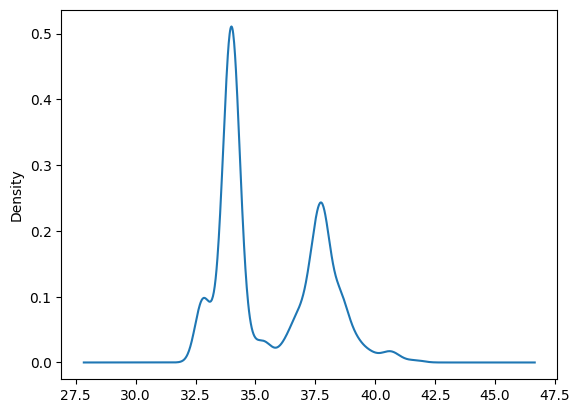

This is the skewness of the housing_median_age : 0.060330637599136865



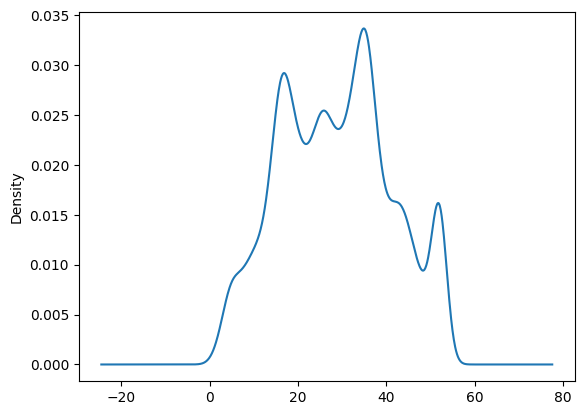

This is the skewness of the total_rooms : 4.147343450632158



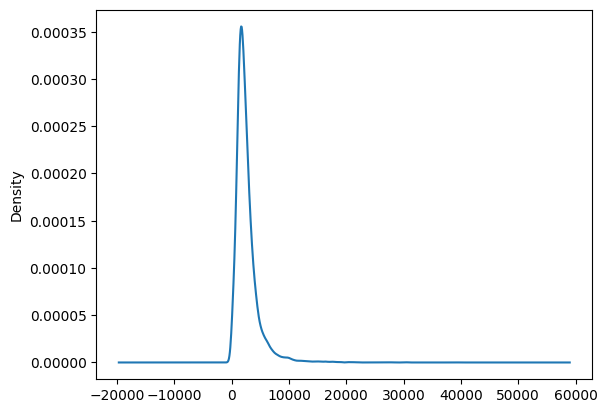

This is the skewness of the total_bedrooms : 3.4811408631013117



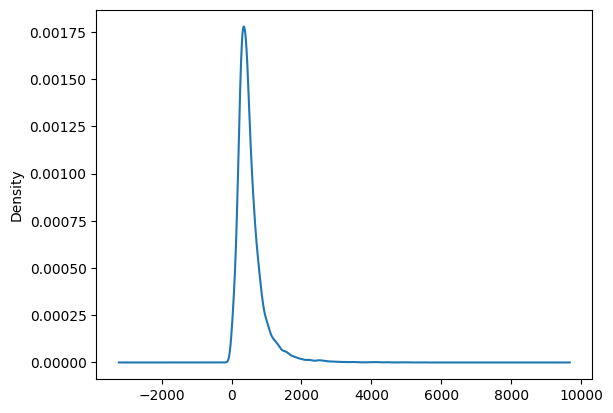

This is the skewness of the population : 4.93585822672712



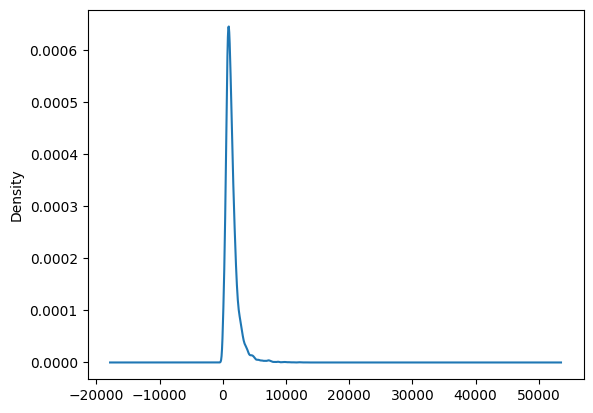

This is the skewness of the households : 3.410437711667147



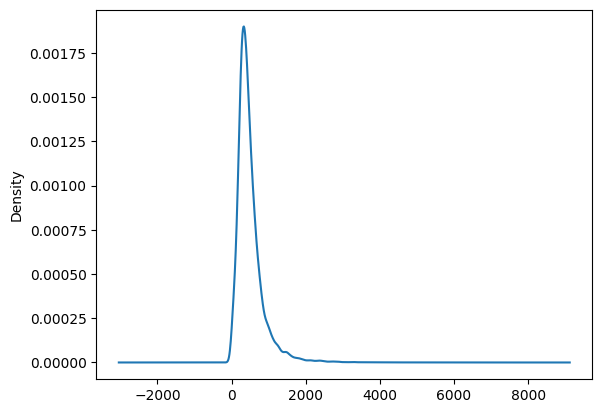

This is the skewness of the median_income : 1.6466567021344465



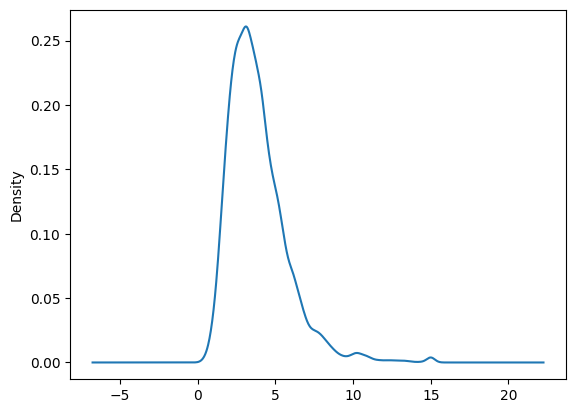

In [ ]:
for col in numerical_col:
  df[col].plot(kind='kde')
  print(f"This is the skewness of the {col} : {df[col].skew()}")
  print()
  plt.show()

In [ ]:
tranformer = ColumnTransformer([
    ('powerTransformer' , PowerTransformer() , numerical_col)
], remainder='passthrough')

In [ ]:
pipeline = Pipeline([
    ('transformer' , tranformer),
    ('model' , LinearRegression())
])

In [ ]:
pipeline.fit(X_train , y_train)

y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.5422370782779109


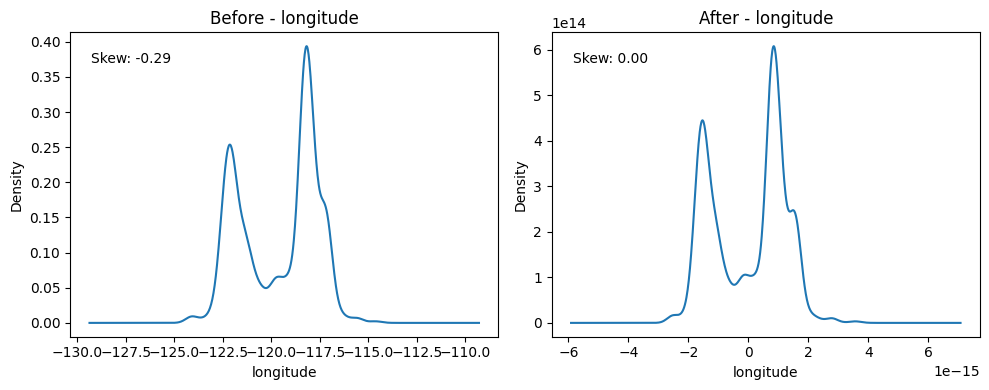

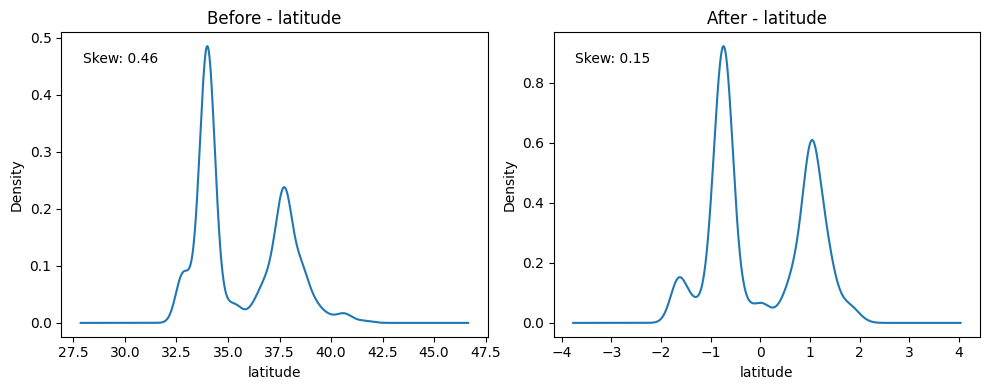

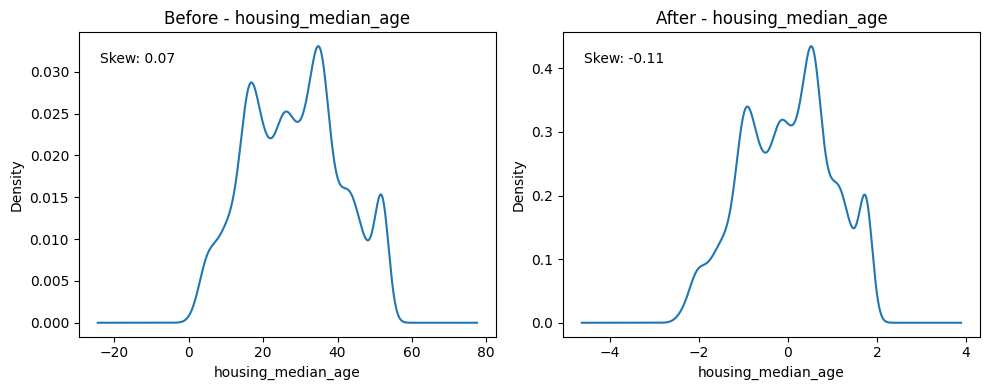

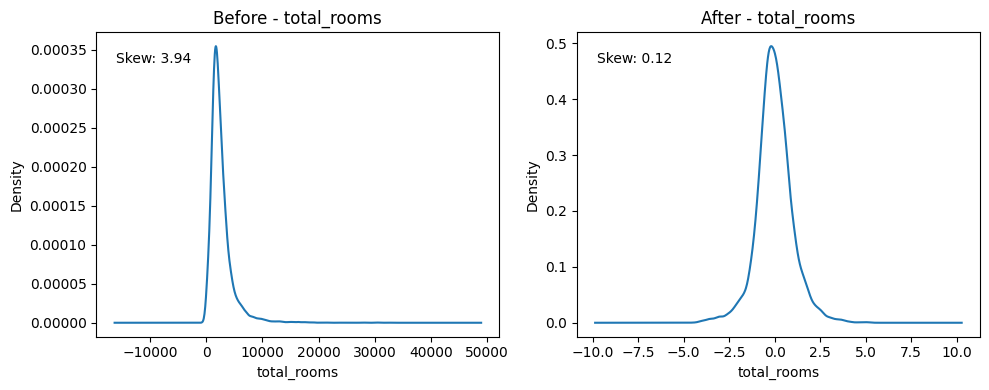

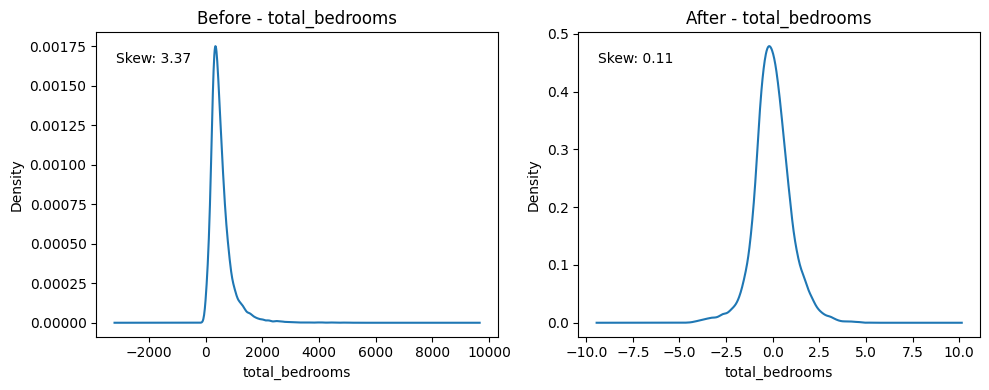

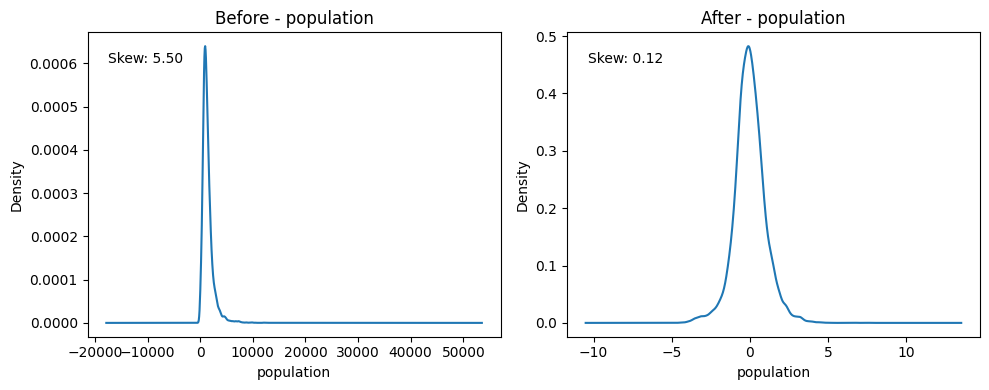

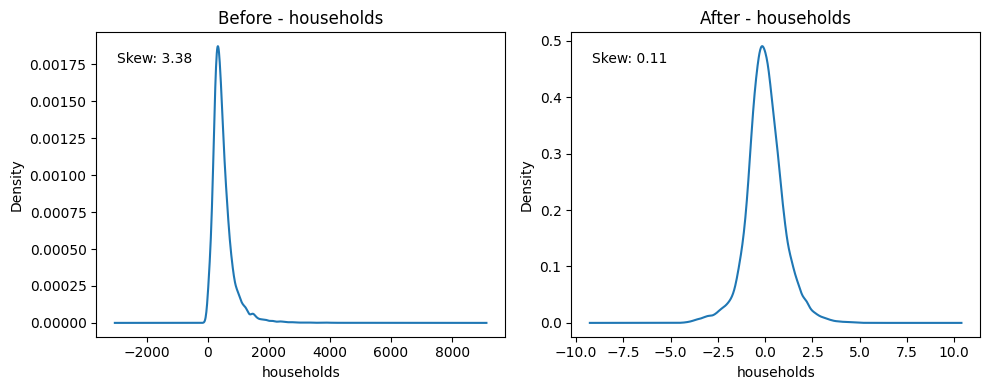

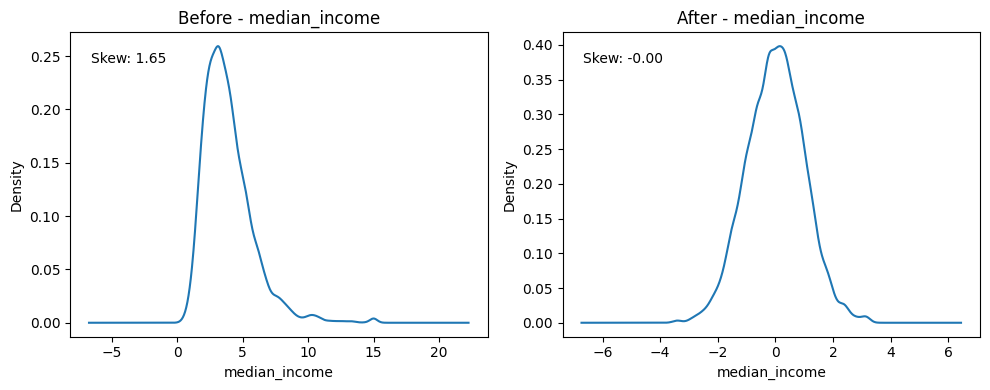

In [ ]:
X_train_transformed = pd.DataFrame(
    pipeline.named_steps['transformer'].transform(X_train),
    columns=numerical_col
)

for col in numerical_col:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Before transformation
    X_train[col].plot(kind='kde', ax=ax[0], title=f"Before - {col}")
    ax[0].set_xlabel(col)
    ax[0].text(0.05, 0.9, f"Skew: {X_train[col].skew():.2f}", transform=ax[0].transAxes)

    # After transformation
    X_train_transformed[col].plot(kind='kde', ax=ax[1], title=f"After - {col}")
    ax[1].set_xlabel(col)
    ax[1].text(0.05, 0.9, f"Skew: {X_train_transformed[col].skew():.2f}", transform=ax[1].transAxes)

    plt.tight_layout()
    plt.show()

# 4. Handling DateTime Values

**Task:**

Extract features like day of the week, month, and year from a datetime column. Use these features to predict a target variable.

In [ ]:
df = pd.read_csv('/content/train (1).csv' , parse_dates=['Date'])
df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
902868,504,6,2013-04-13,6202,957,1,0,0,0
202260,446,6,2015-01-31,3419,393,1,0,0,0
172058,349,5,2015-02-27,8049,847,1,0,0,0
1008306,17,2,2013-01-08,9034,1087,1,1,0,0
877138,419,1,2013-05-06,5300,941,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [ ]:
X = df.drop(columns=['Sales' , 'Date' , 'StateHoliday'])
y = df['Sales']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.8517161522833583


In [ ]:
new_df = df.copy()

new_df['DayOfWeek'] = new_df['Date'].dt.dayofweek
new_df['Year'] = new_df['Date'].dt.year
new_df['Month'] = new_df['Date'].dt.month
new_df['Day'] = new_df['Date'].dt.day
new_df['IsWeekend'] = new_df['Date'].dt.dayofweek.isin([5, 6]).astype(int)

In [ ]:
X = new_df.drop(columns=['Sales' , 'Date' , 'StateHoliday'])
y = new_df['Sales']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.8551327150579595


# 5. Handling Missing Values

**Task:**

Implement multiple imputation strategies (mean, median, KNN, IterativeImputer) on a dataset with missing values. Compare the results using cross-validation.

In [ ]:
df = pd.read_csv('/content/housing.csv')
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3923,-118.56,34.19,34.0,1237.0,242.0,671.0,221.0,3.9615,183600.0,<1H OCEAN
7672,-118.08,33.93,33.0,2263.0,511.0,1626.0,457.0,3.5556,172800.0,<1H OCEAN
16186,-121.29,37.95,52.0,107.0,79.0,167.0,53.0,0.7917,22500.0,INLAND
2610,-123.98,40.88,41.0,1719.0,372.0,844.0,336.0,2.6923,84200.0,<1H OCEAN
13644,-117.33,34.06,36.0,755.0,157.0,625.0,152.0,2.0242,65000.0,INLAND


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


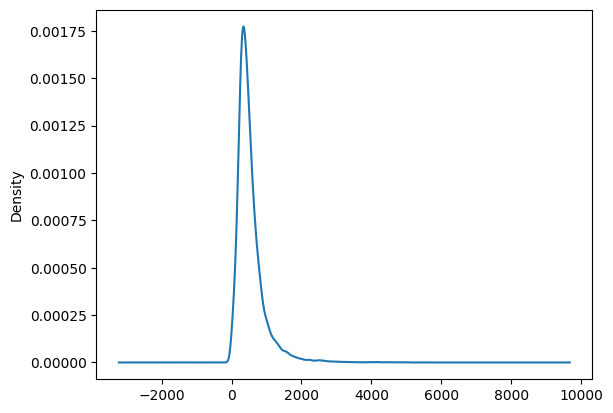

In [ ]:
df['total_bedrooms'].plot(kind='kde')
df['total_bedrooms'].skew()

X = df.drop(columns=['median_house_value' , 'ocean_proximity'])
y = df['median_house_value']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [ ]:
tranformer_simpleImputer_mean = ColumnTransformer([
    ('simpleImputer_mean' , SimpleImputer(strategy='mean') , ['total_bedrooms'])
], remainder='passthrough')

tranformer_simpleImputer_median = ColumnTransformer([
    ('simpleImputer_median' , SimpleImputer(strategy='median') , ['total_bedrooms'])
], remainder='passthrough')

tranformer_knnImputer = ColumnTransformer([
    ('KnnImputer' , KNNImputer() , ['total_bedrooms'])
], remainder='passthrough')

tranformer_IterativeImputer = ColumnTransformer([
    ('IterativeImputer' , IterativeImputer() , ['total_bedrooms'])
], remainder='passthrough')

In [ ]:
pipeline_with_simpleImputer_mean = Pipeline([
    ('tranformer_simpleImputer_mean' , tranformer_simpleImputer_mean),
    ('model1' , LinearRegression())
])

pipeline_with_simpleImputer_median = Pipeline([
    ('tranformer_simpleImputer_median' , tranformer_simpleImputer_median),
    ('model2' , LinearRegression())
])

pipeline_with_KNNImputer = Pipeline([
    ('tranformer_knnImputer' , tranformer_knnImputer),
    ('model3' , LinearRegression())
])

pipeline_with_iterative = Pipeline([
    ('IterativeImputer' , IterativeImputer(random_state=42)),
    ('model4' , LinearRegression())
])

In [ ]:
pipeline_with_simpleImputer_median.fit(X_train , y_train)

y_pred = pipeline_with_simpleImputer_median.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.6299705583996813


In [ ]:
pipeline_with_simpleImputer_mean.fit(X_train , y_train)

y_pred = pipeline_with_simpleImputer_mean.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.6303302015489974


In [ ]:
pipeline_with_KNNImputer.fit(X_train , y_train)

y_pred = pipeline_with_KNNImputer.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.6303302015489974


In [ ]:
pipeline_with_iterative.fit(X_train , y_train)

y_pred = pipeline_with_iterative.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.6375405710942932


# 6. Outlier Detection & Removal

**Task:**

Detect outliers using Z-score and IQR methods. Remove or cap the outliers and evaluate the impact on model accuracy.

In [ ]:
df = pd.read_excel('/content/default of credit card clients.xls' , header=1)

In [ ]:
df.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
13006,13007,80000,2,1,2,24,-1,-1,-1,-1,...,741,390,765,1063,390,741,390,765,390,0
19387,19388,240000,2,2,2,29,-1,-1,-1,-1,...,1486,1776,2308,1526,2276,1486,1776,2308,776,1
14549,14550,200000,2,1,2,31,-1,-1,-1,-1,...,390,390,390,790,1230,390,390,390,390,1
17309,17310,100000,2,1,1,42,2,2,0,0,...,59014,55249,47645,3000,3039,3315,3000,3000,3000,1
212,213,40000,2,3,1,43,0,0,0,0,...,36207,33138,31339,1700,1504,1200,1500,1500,1000,0
25256,25257,60000,2,2,2,23,0,0,0,2,...,24053,17154,19316,2000,4000,0,2000,3000,0,0
15872,15873,110000,2,1,2,28,0,0,0,0,...,63520,62529,58228,3500,3899,3000,1800,3000,2000,0
12511,12512,150000,2,2,2,23,0,0,0,2,...,8433,6741,7586,2074,1926,0,408,3000,8275,0
20448,20449,180000,1,1,2,26,-1,-1,-1,-1,...,770,4159,4159,9500,10122,770,4159,0,5243,0
11767,11768,280000,2,2,2,33,-2,-2,-1,0,...,1735,1714,843,3700,1735,0,1700,1000,22000,1


In [ ]:
numerical_col = []
for col in df.columns:
  if df[col].dtype == 'int64':
    numerical_col.append(col)

In [ ]:
X = df.drop(columns=['ID' , 'default payment next month'])
y = df['default payment next month']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test , y_pred)

0.8081111111111111

In [ ]:
numerical_col.remove('ID')

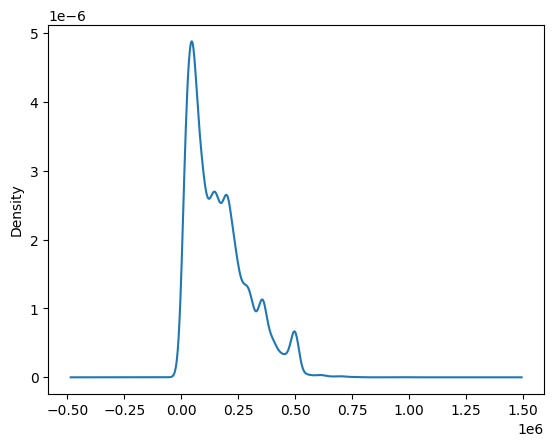

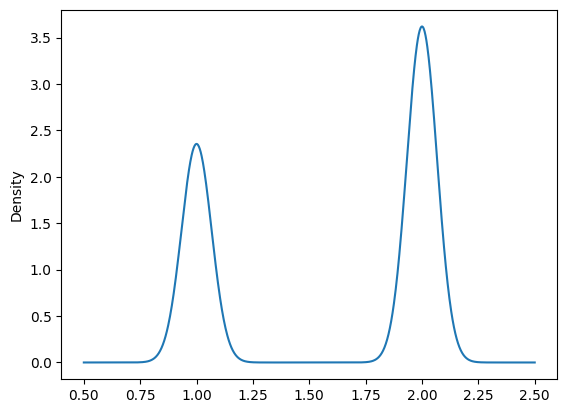

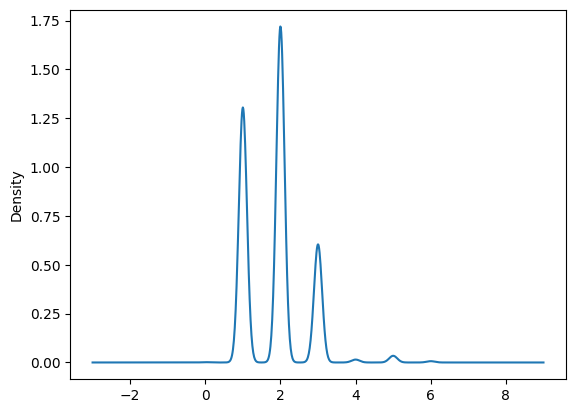

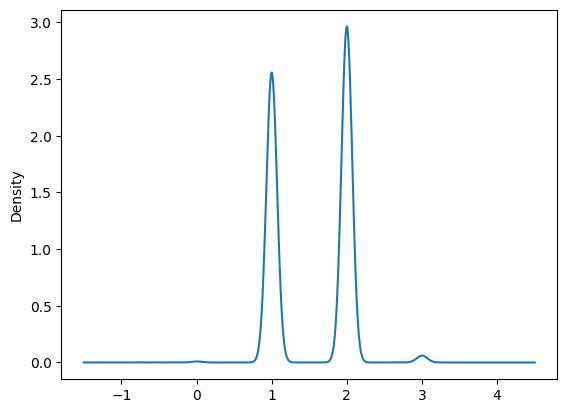

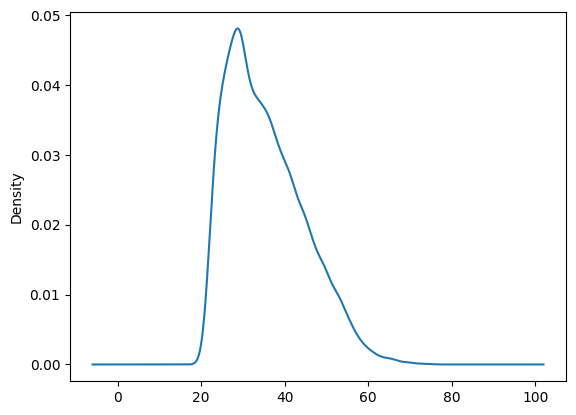

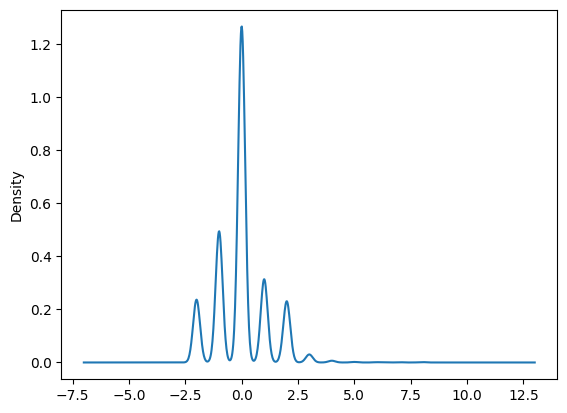

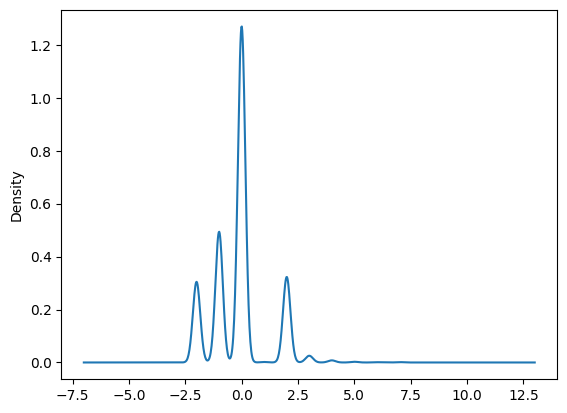

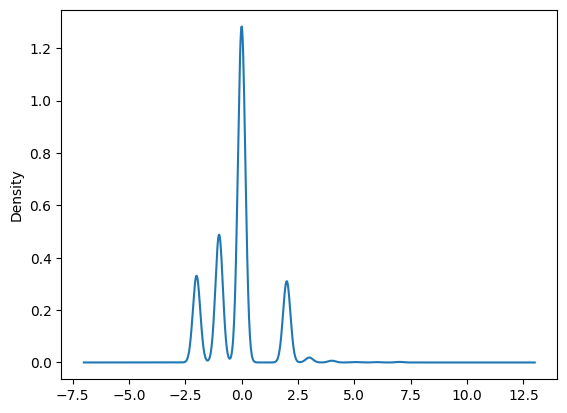

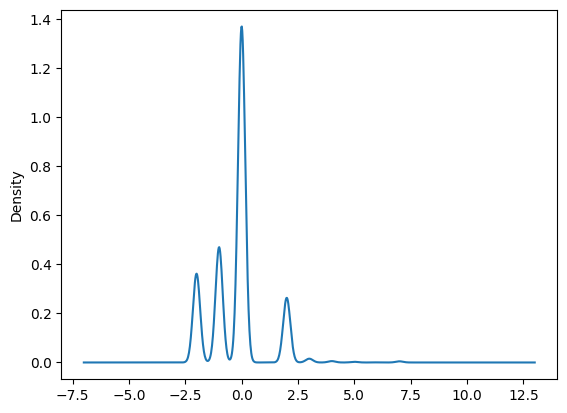

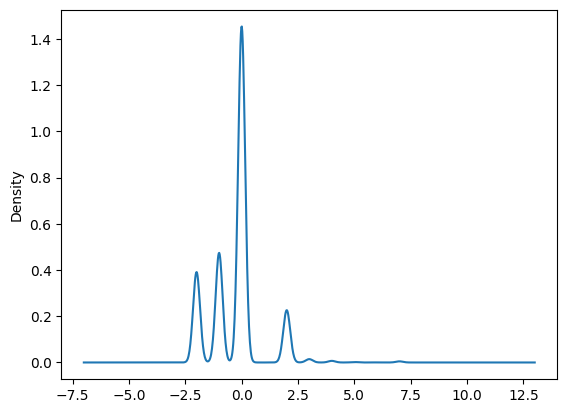

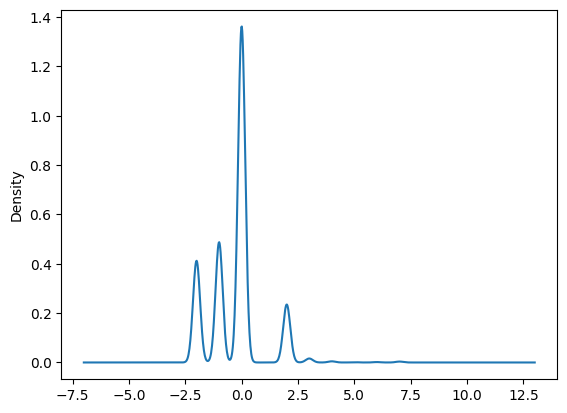

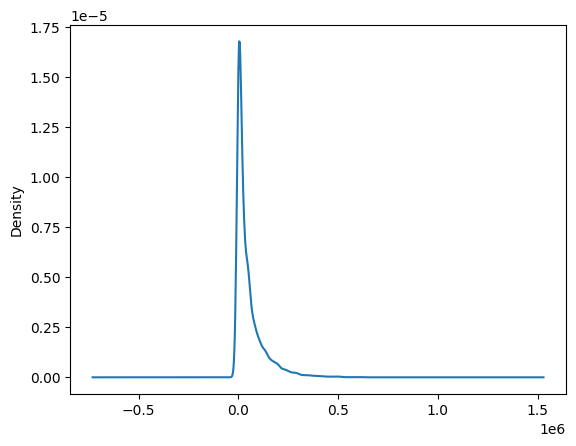

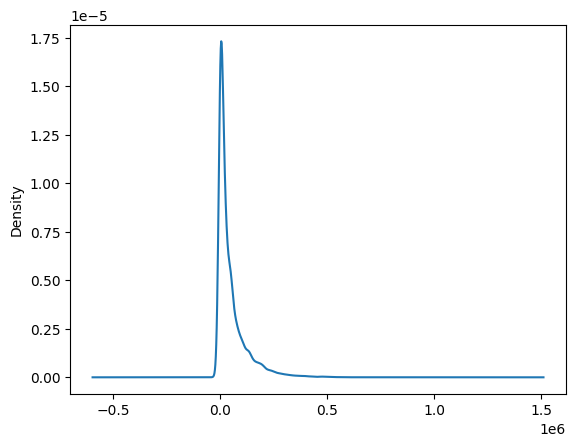

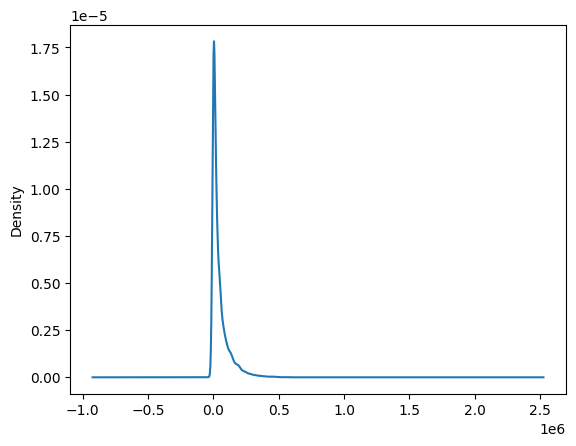

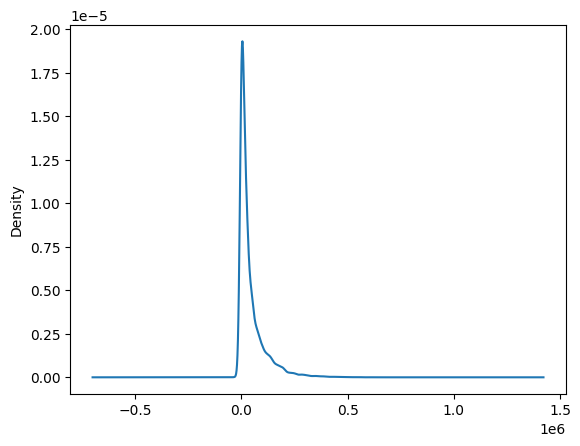

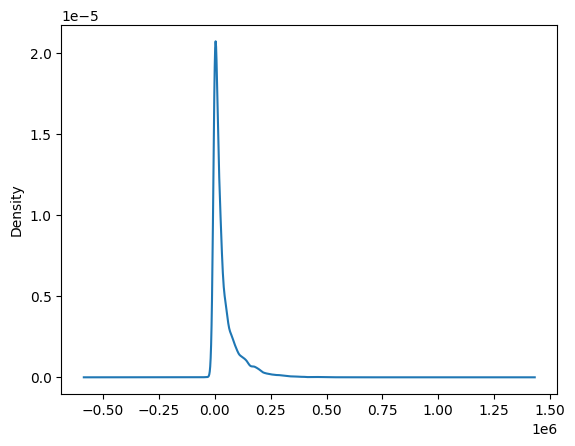

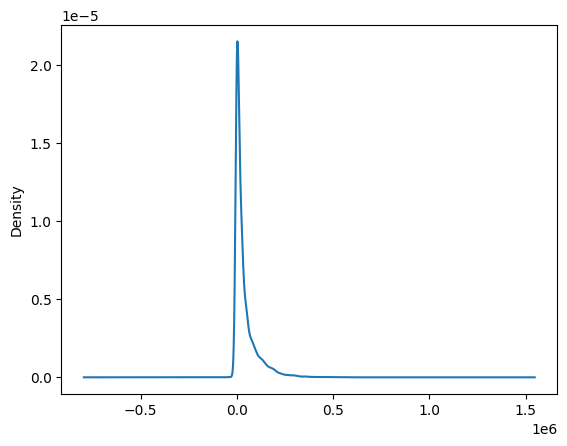

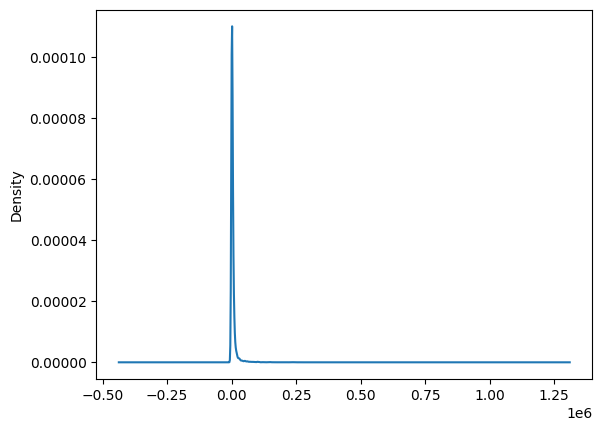

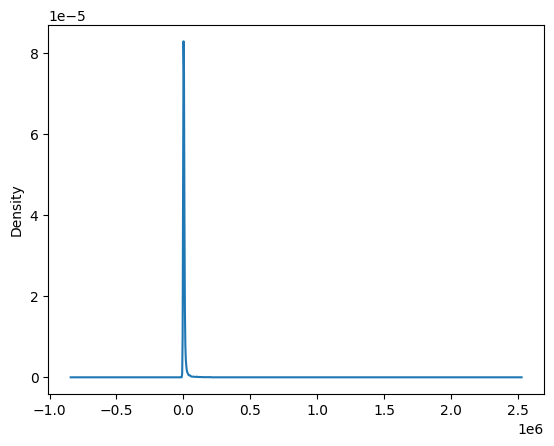

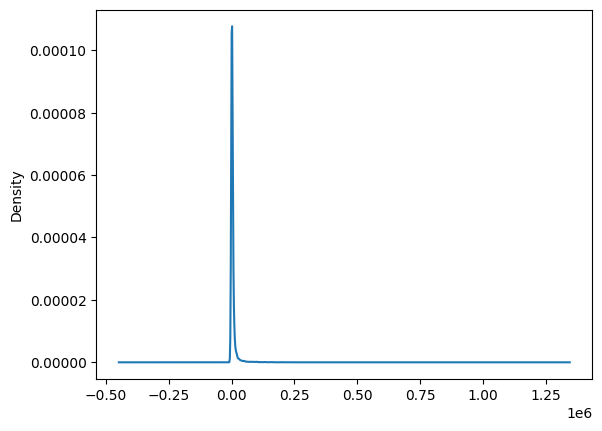

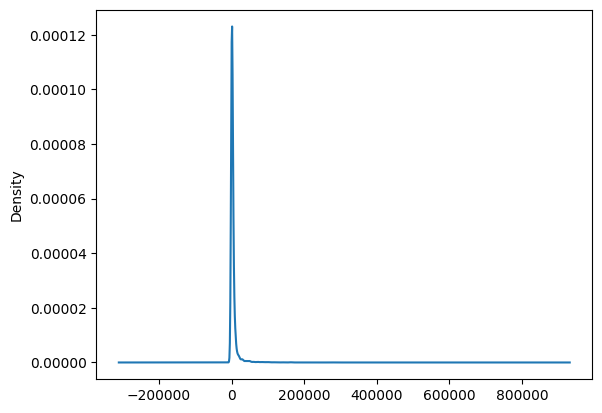

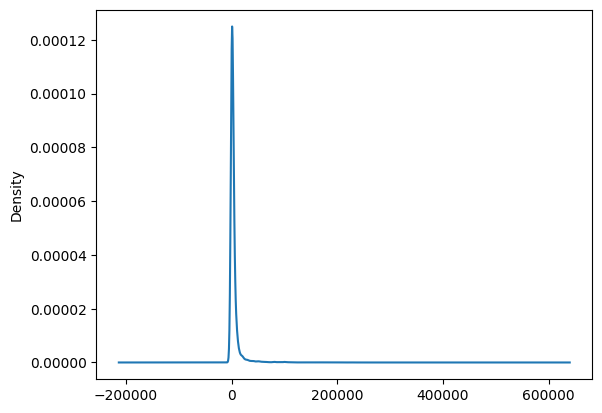

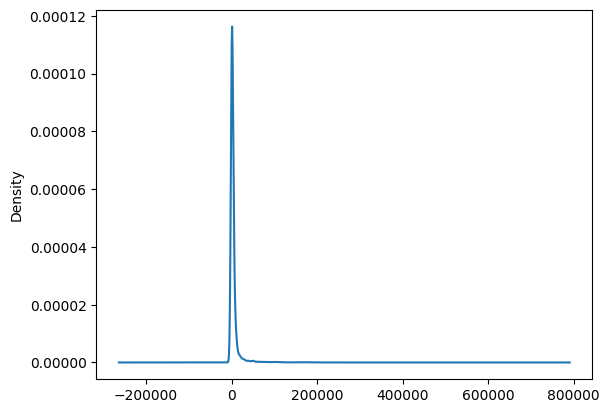

KeyError: 'default payment next month'

In [ ]:
for col in numerical_col:
  X_train[col].plot(kind='kde')
  plt.show()

In [ ]:
z_score = stats.zscore(df[numerical_col])

In [ ]:
upper_limit = z_score.mean() + 2 * z_score.std()
lower_limit = z_score.mean() - 2 * z_score.std()

In [ ]:
new_df = df[(z_score < upper_limit).all(axis=1) & (z_score > lower_limit).all(axis=1)]

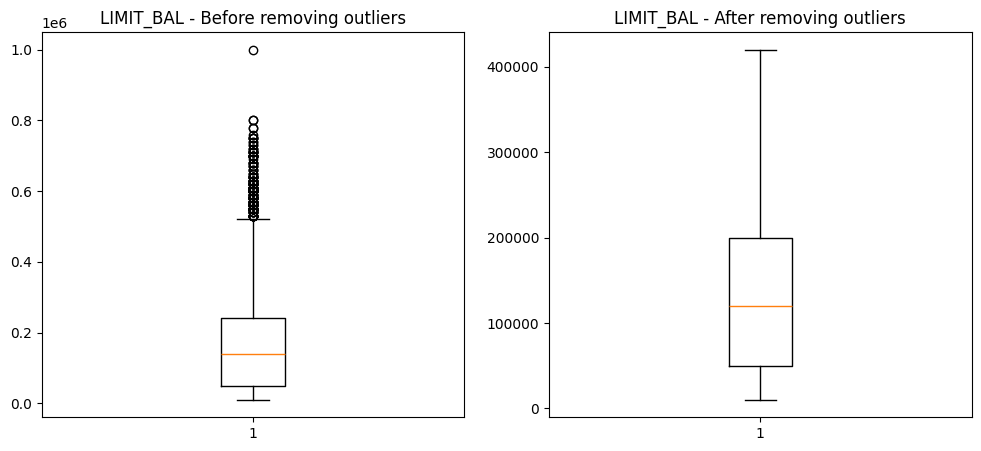

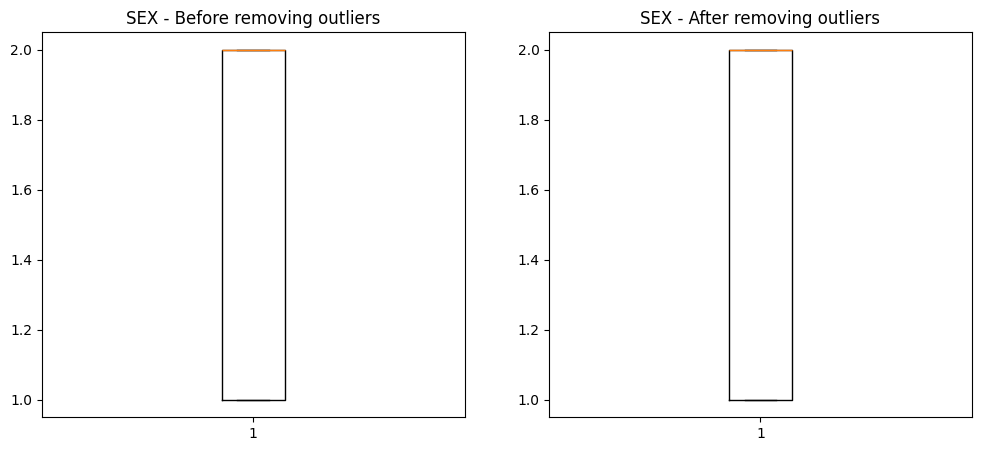

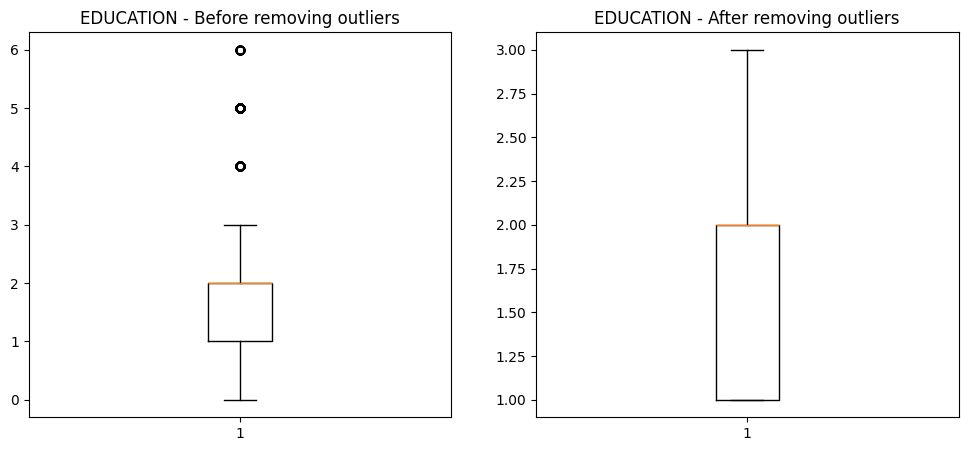

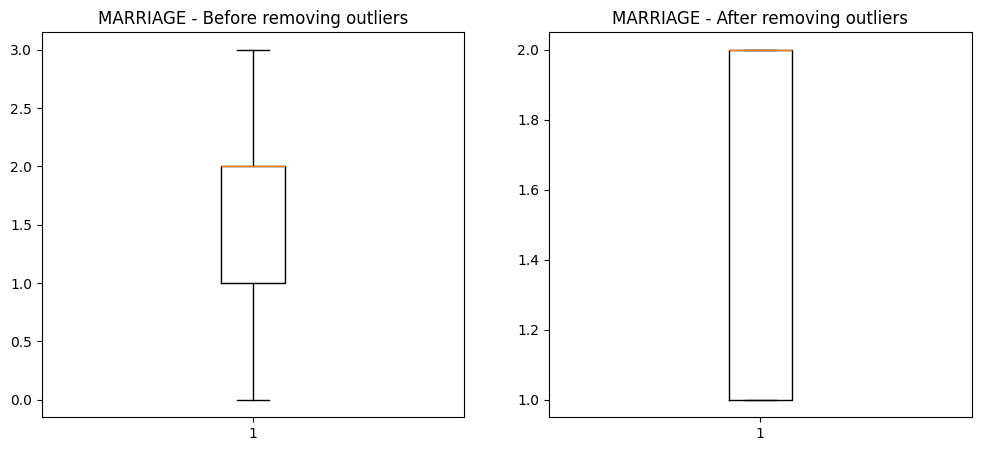

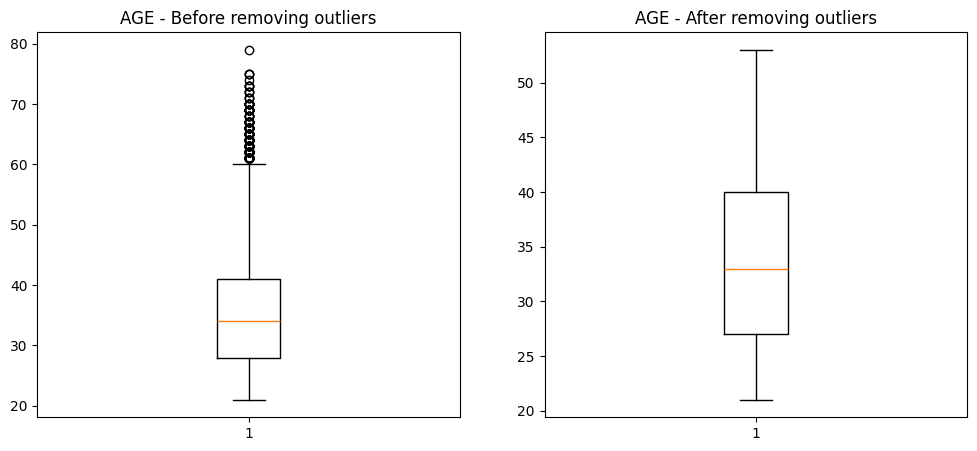

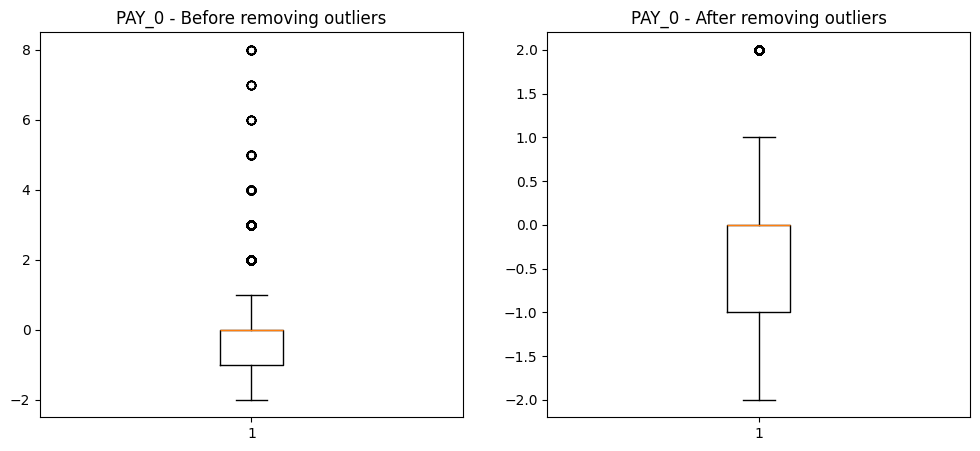

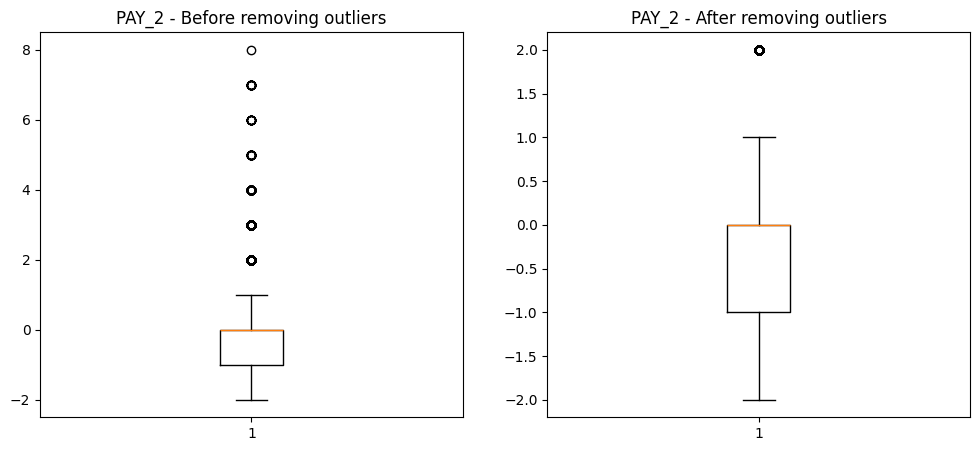

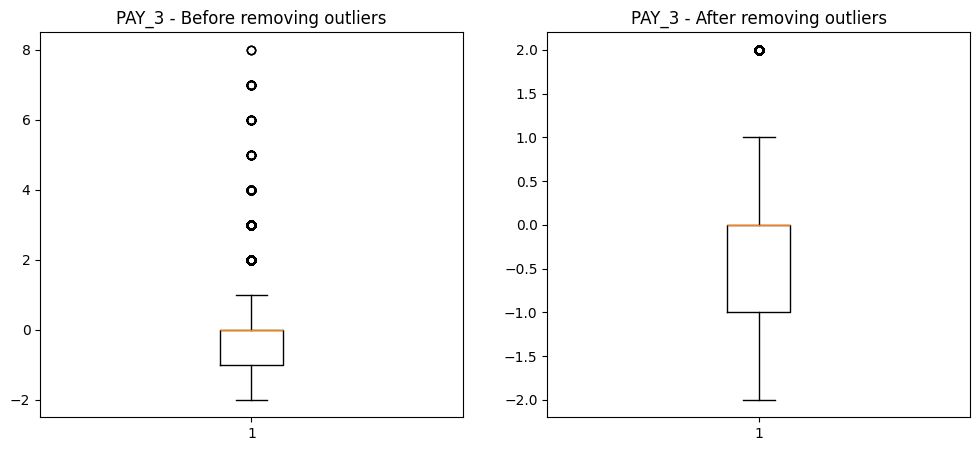

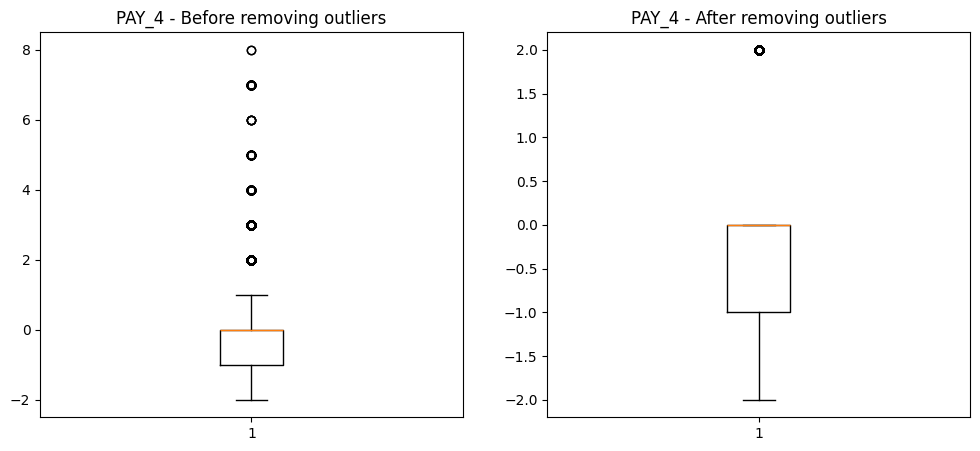

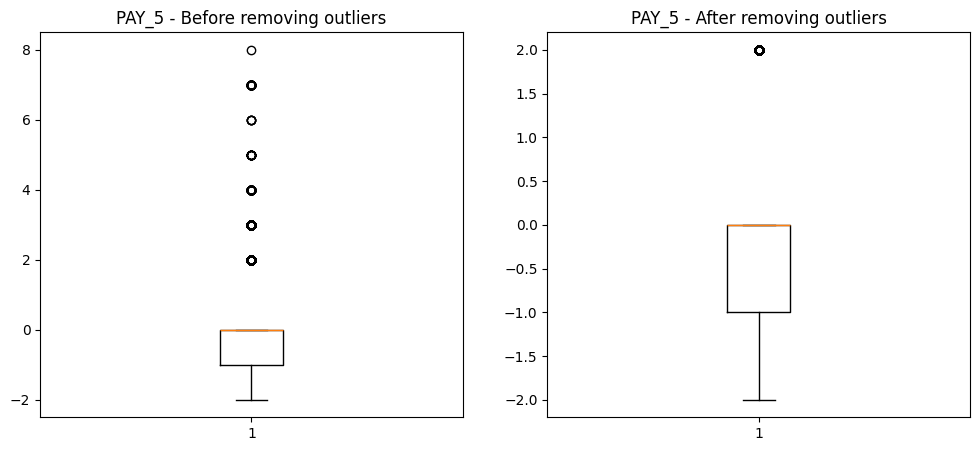

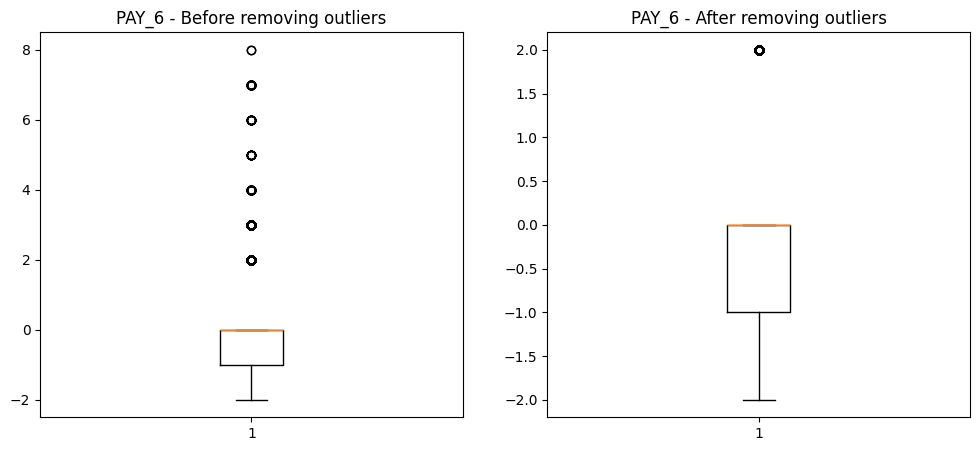

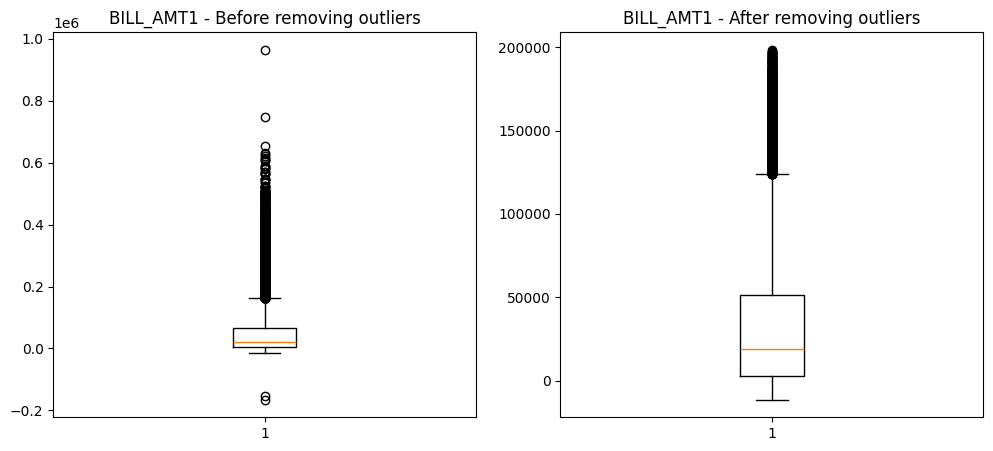

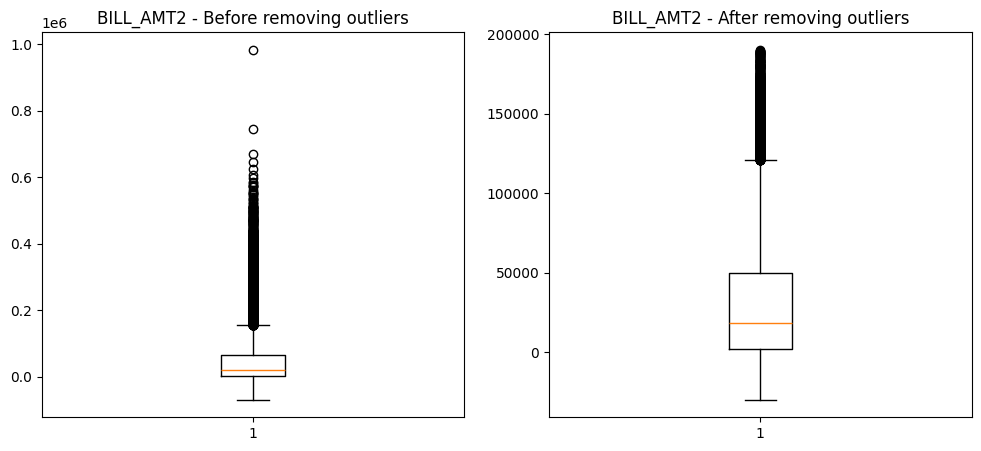

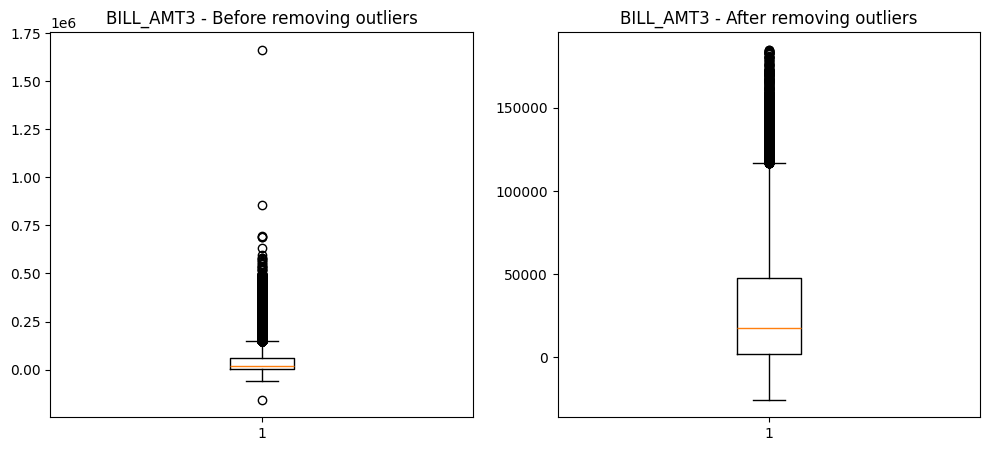

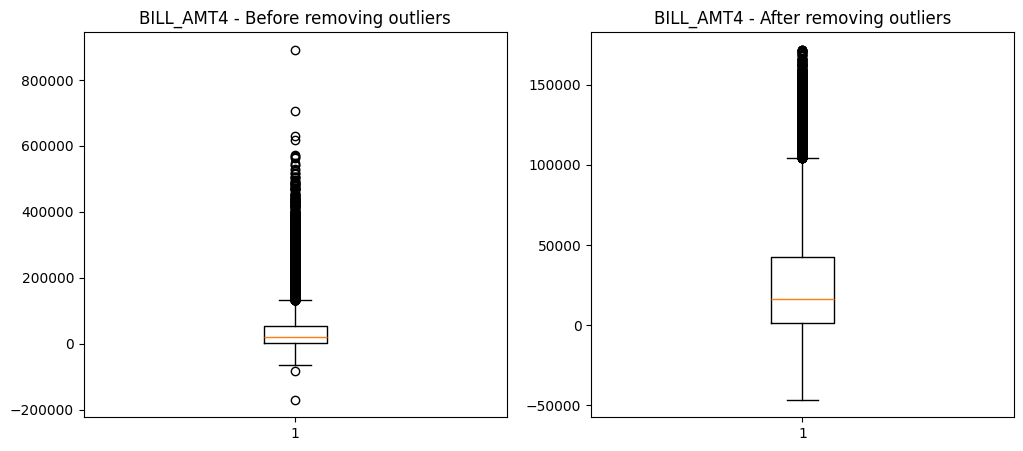

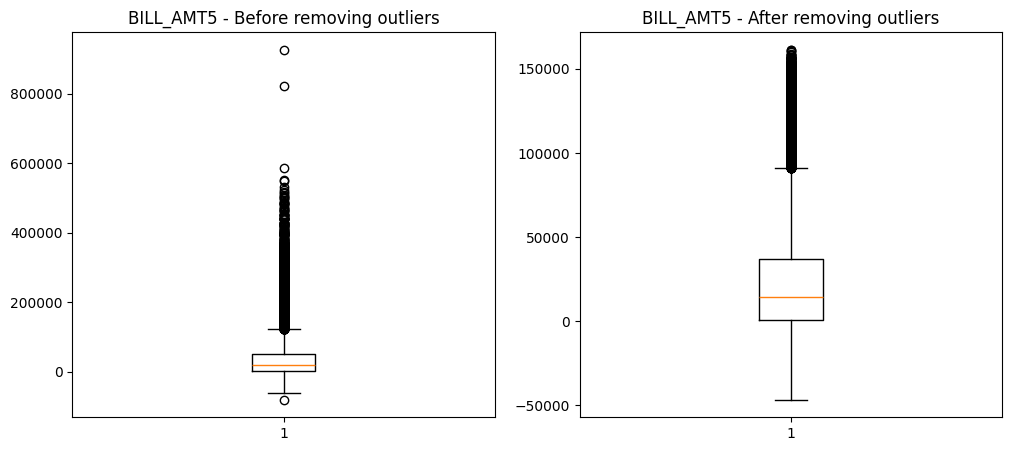

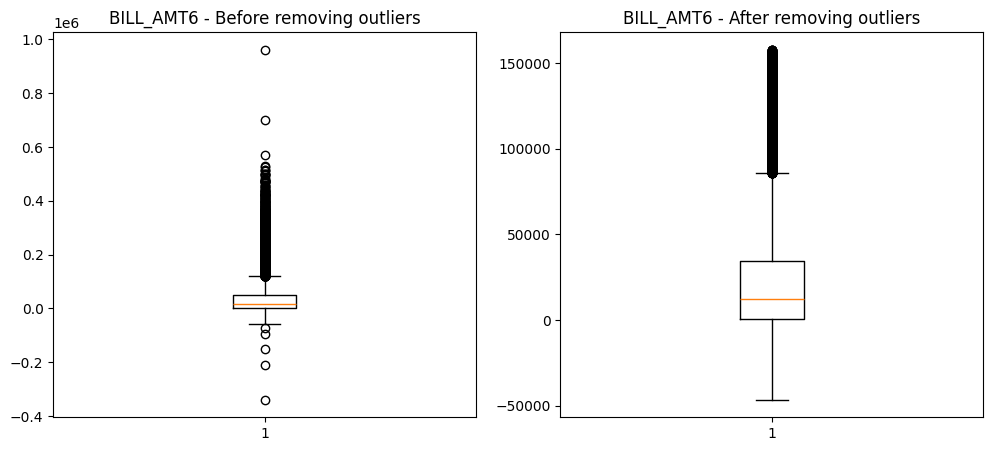

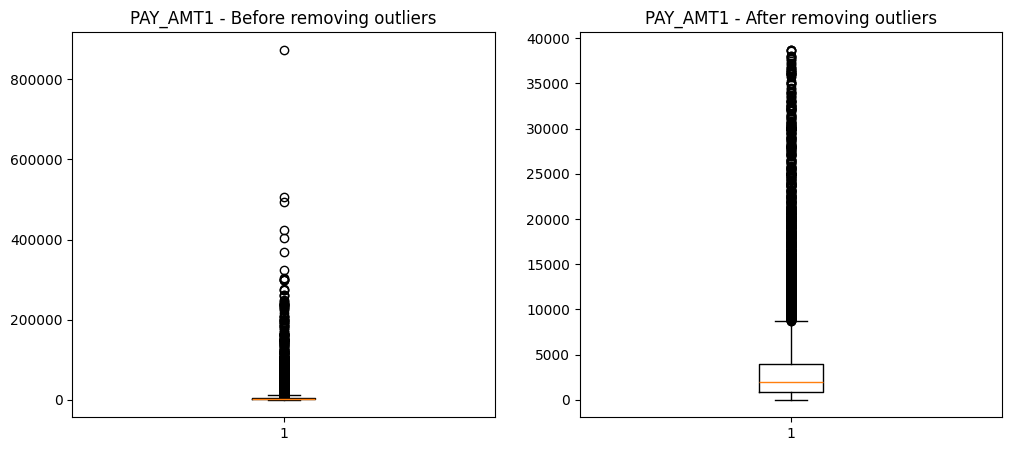

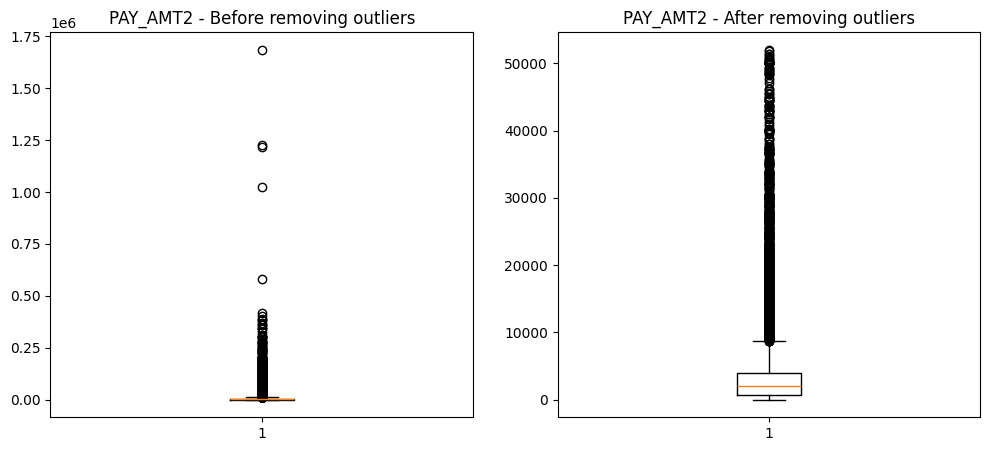

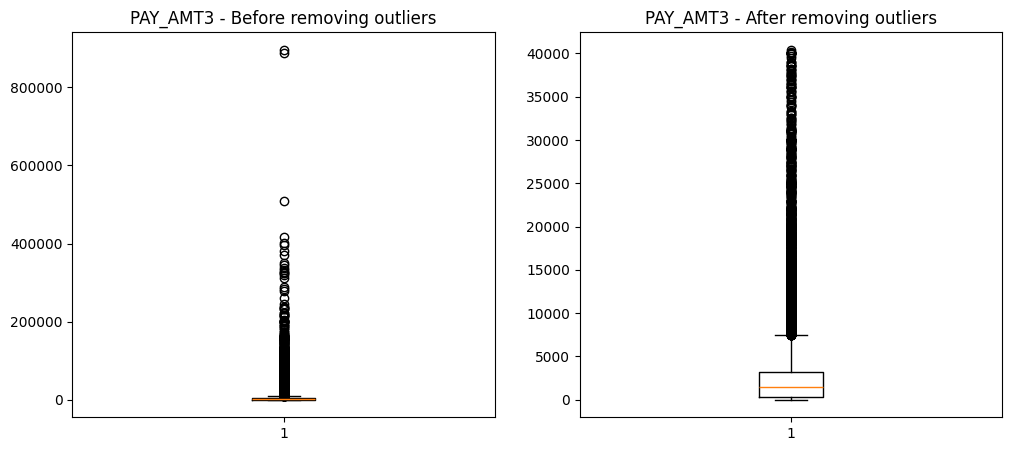

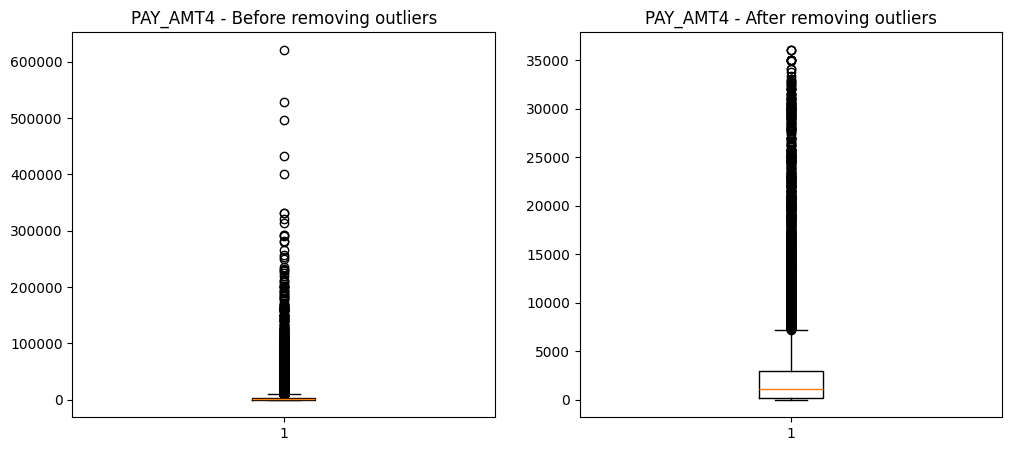

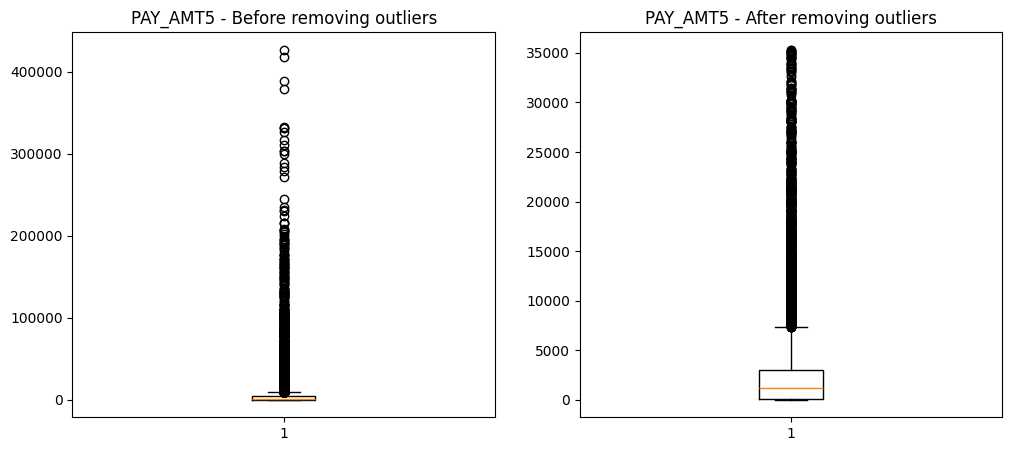

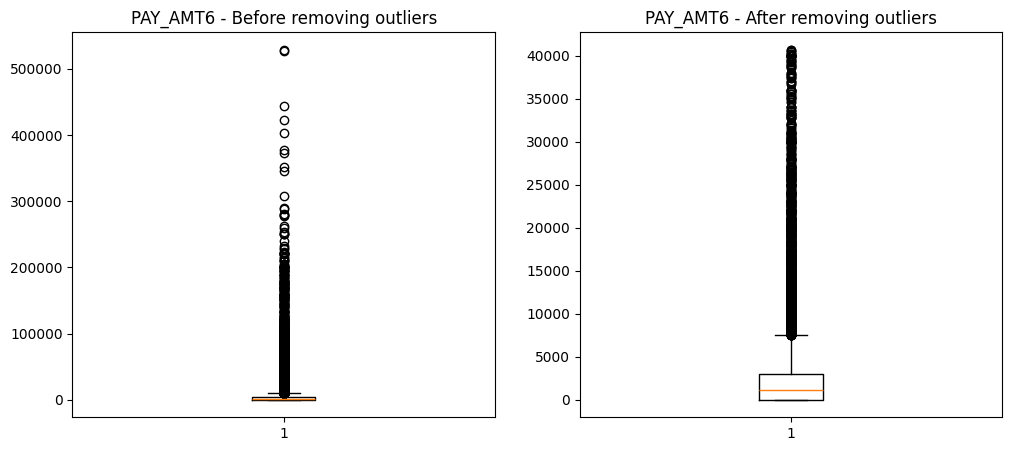

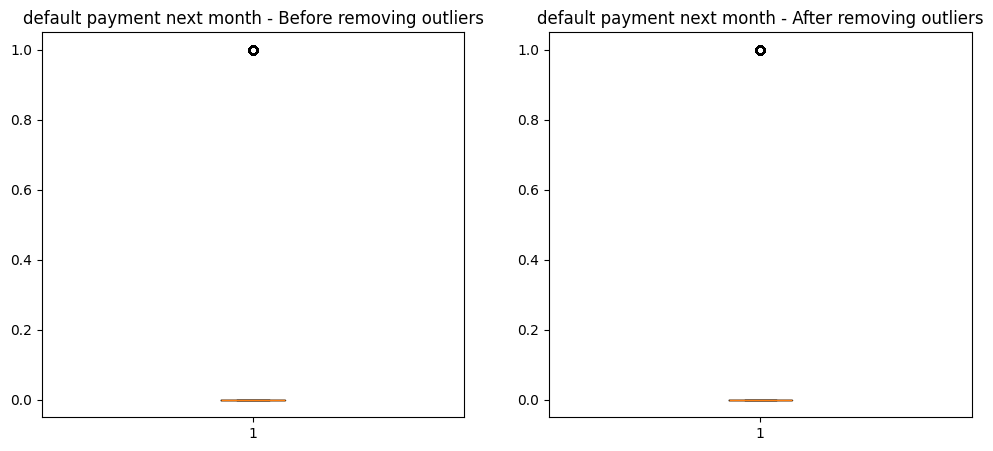

In [ ]:
for col in numerical_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Boxplot before removing outliers
    axes[0].boxplot(df[col])
    axes[0].set_title(f'{col} - Before removing outliers')

    # Boxplot after removing outliers
    axes[1].boxplot(new_df[col])
    axes[1].set_title(f'{col} - After removing outliers')

    plt.show()

In [ ]:
# Assuming 'target_column' is your label
X = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

print(X.shape, y.shape)  # Both should match


(21897, 24) (21897,)


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test , y_pred)

0.8015220700152207

In [ ]:
df_new = df.copy()
new_df = np.where(
    z_score > upper_limit,
    upper_limit,
    np.where(
        z_score < lower_limit,
        lower_limit,
        df_new[numerical_col]
    )
)

In [ ]:
new_df = pd.DataFrame(new_df, columns=numerical_col)

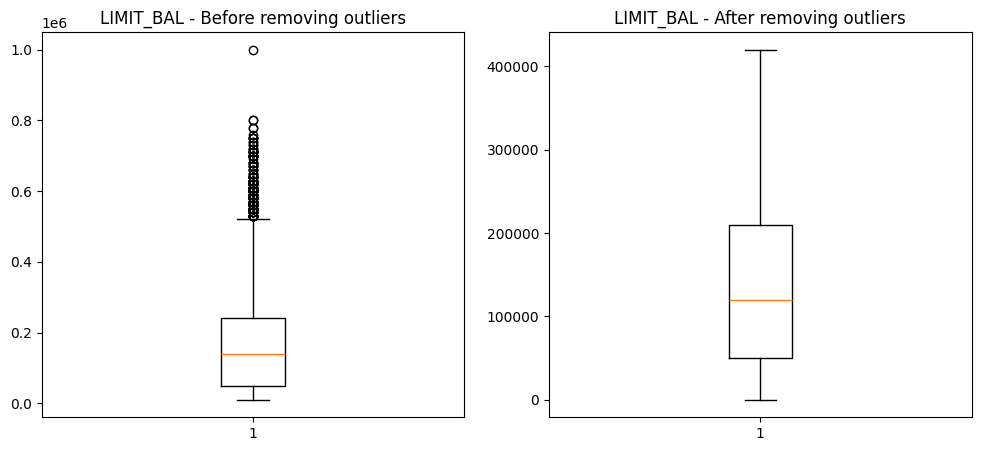

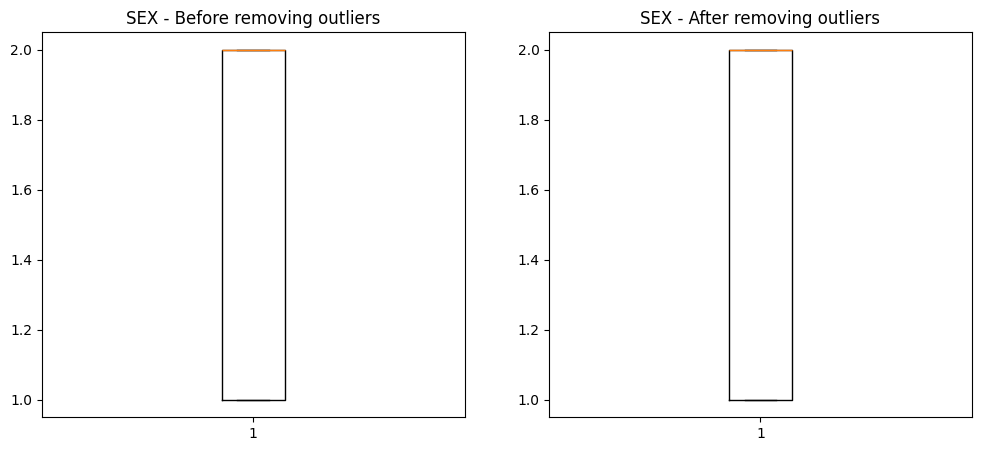

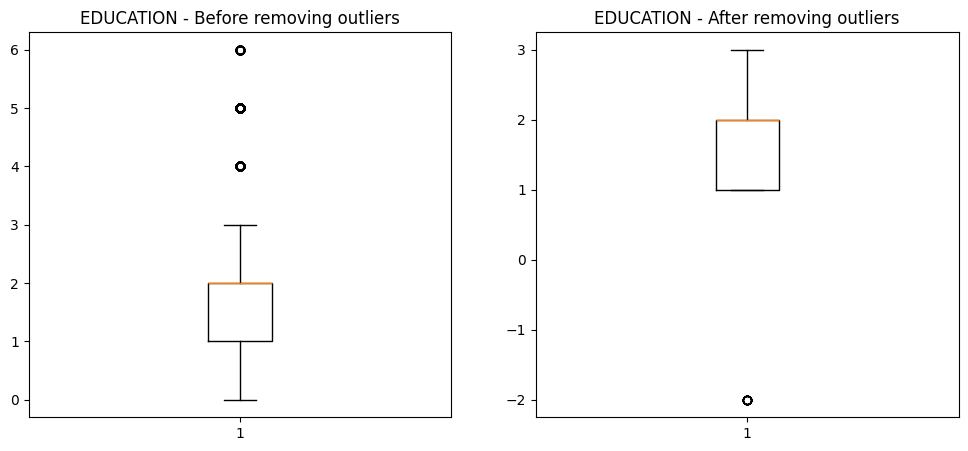

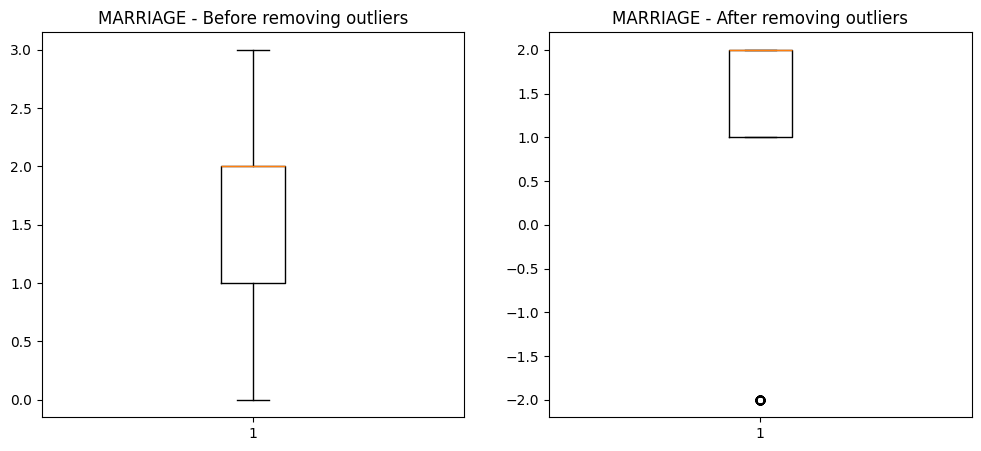

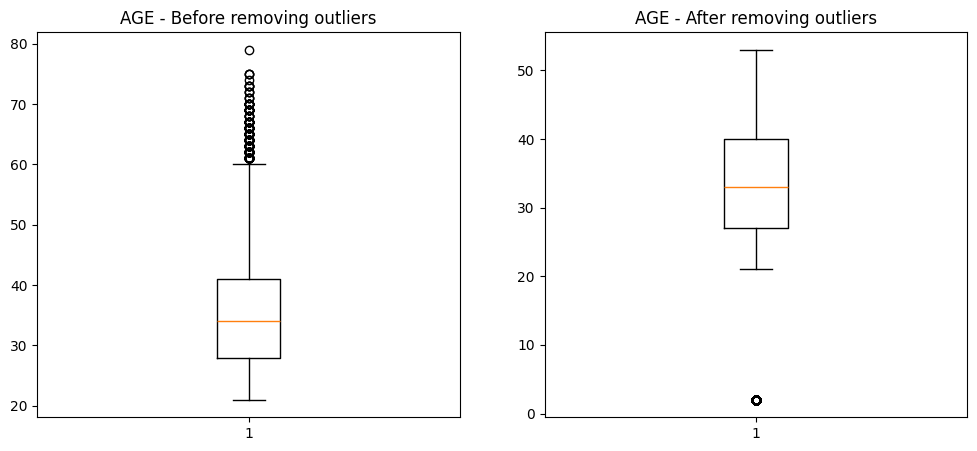

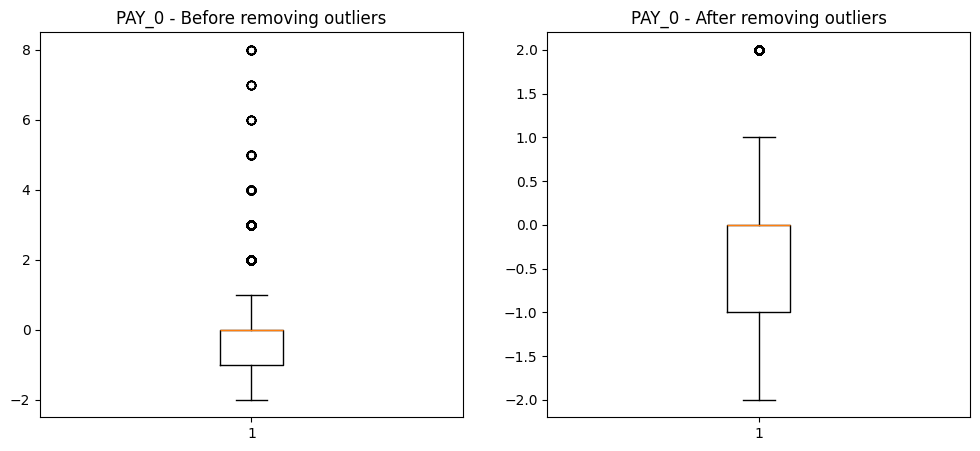

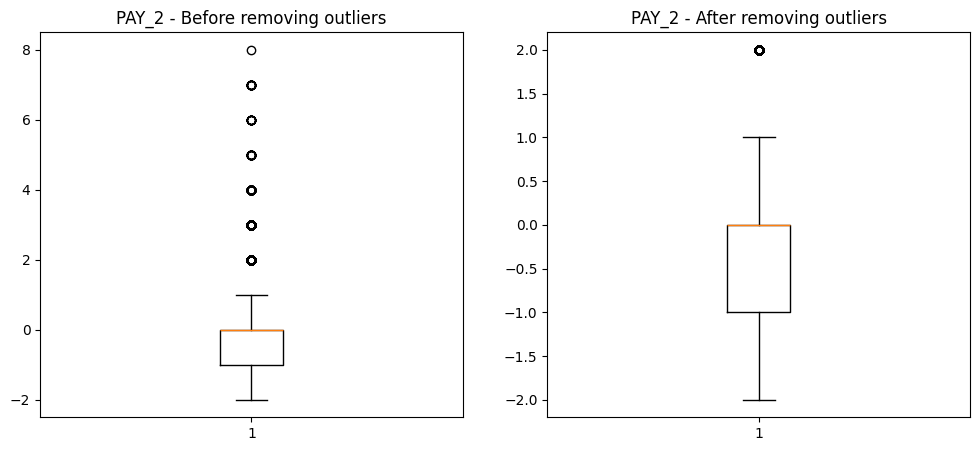

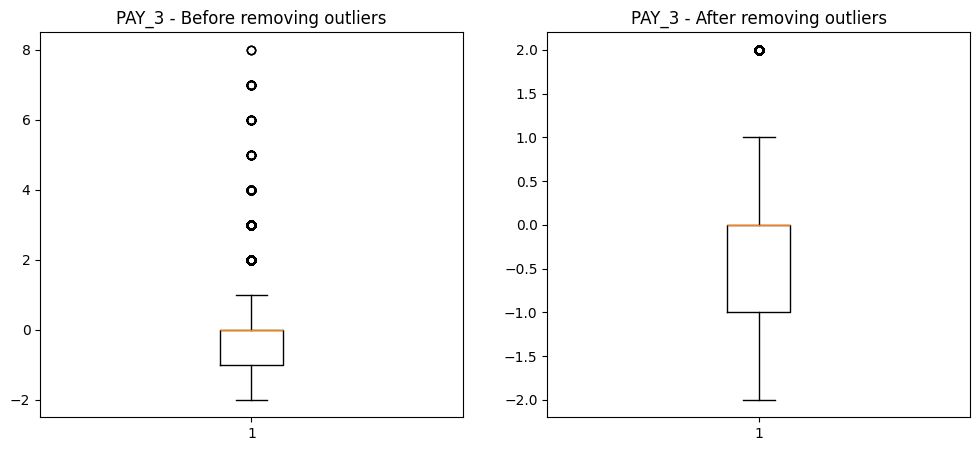

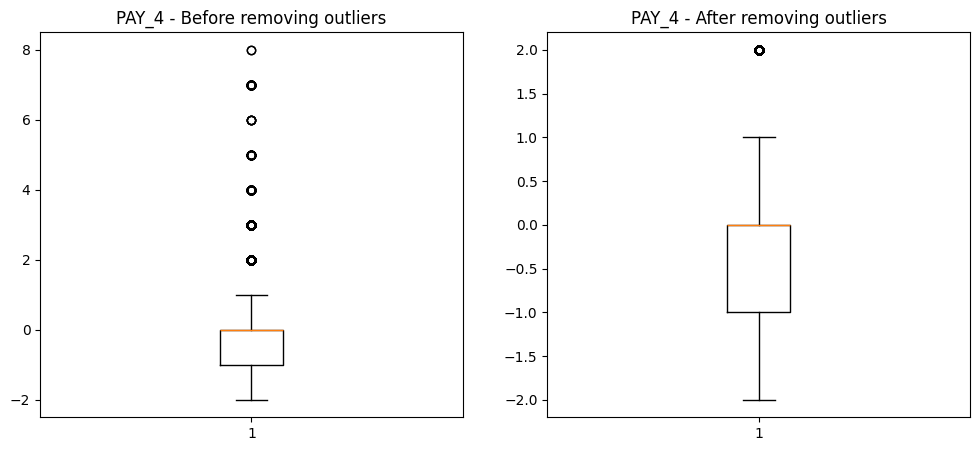

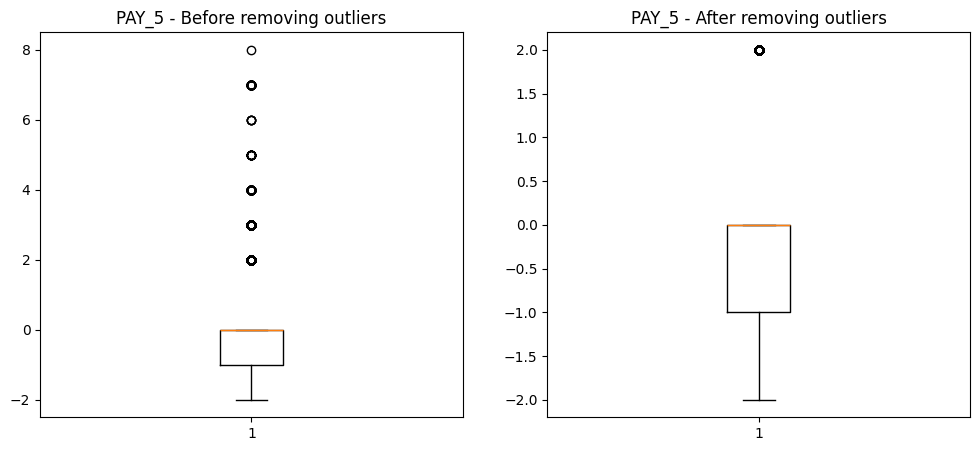

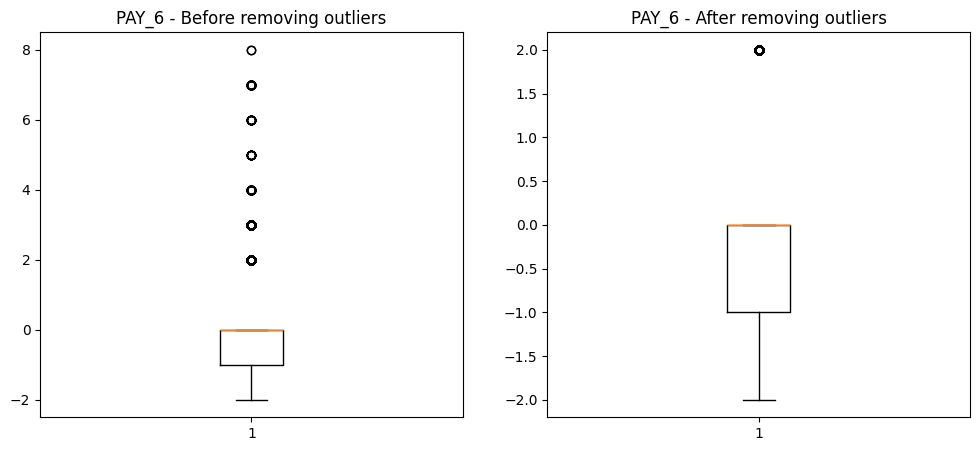

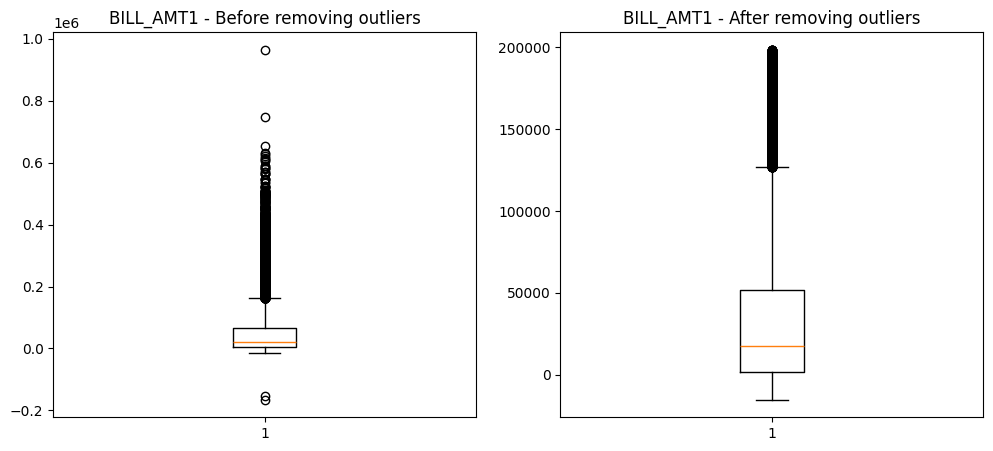

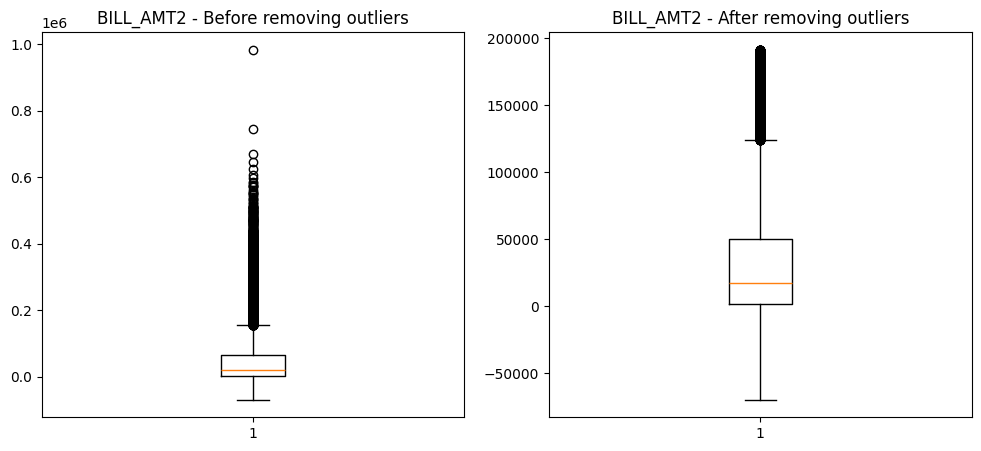

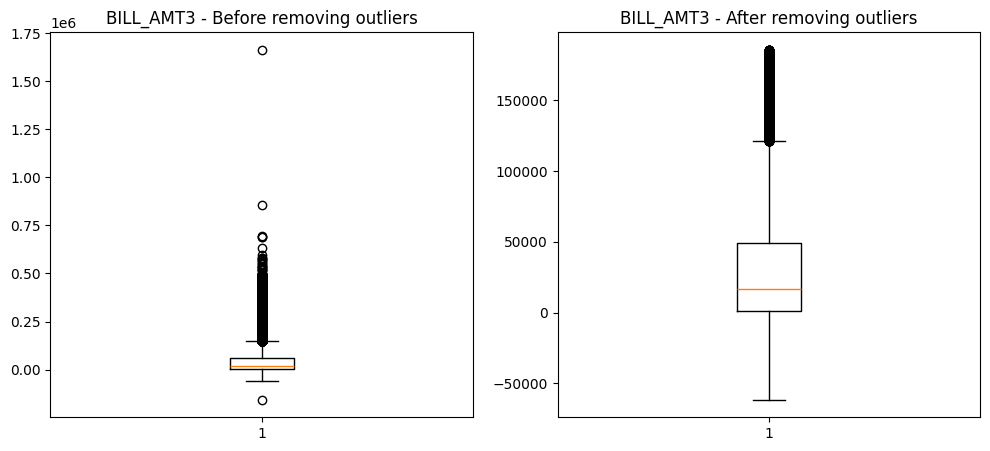

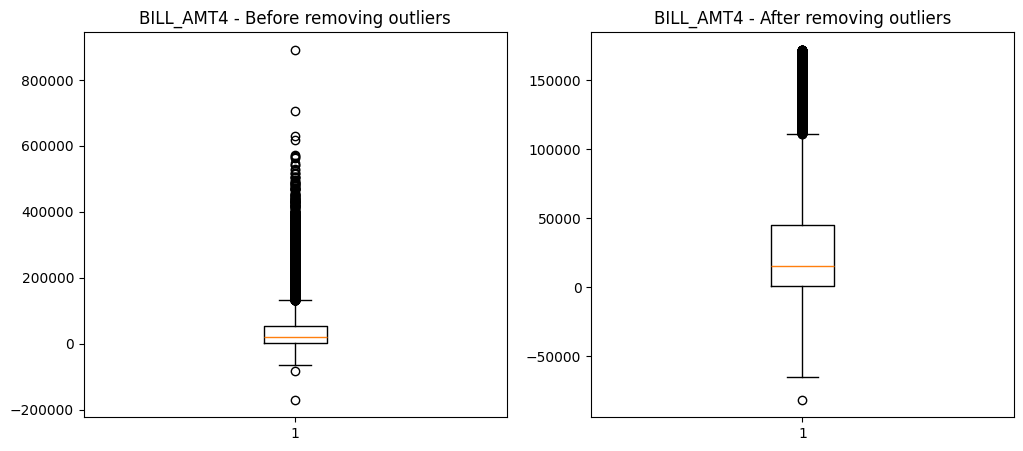

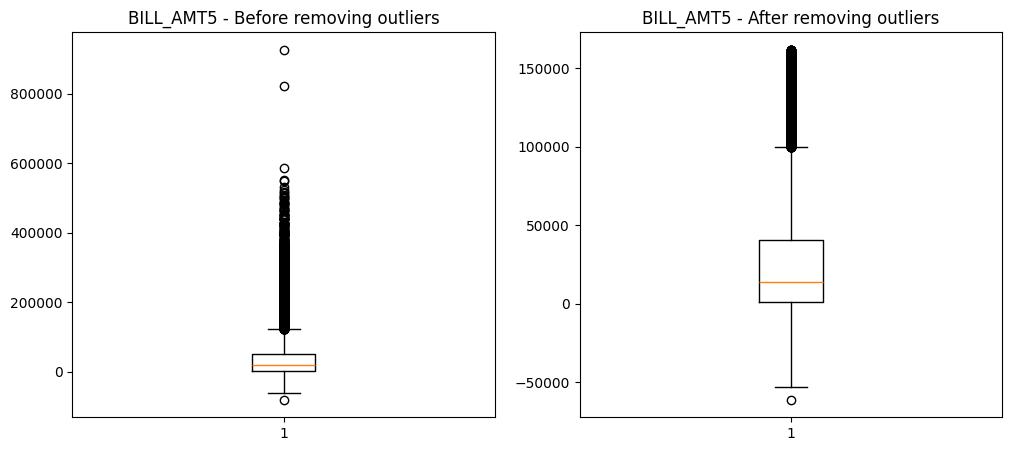

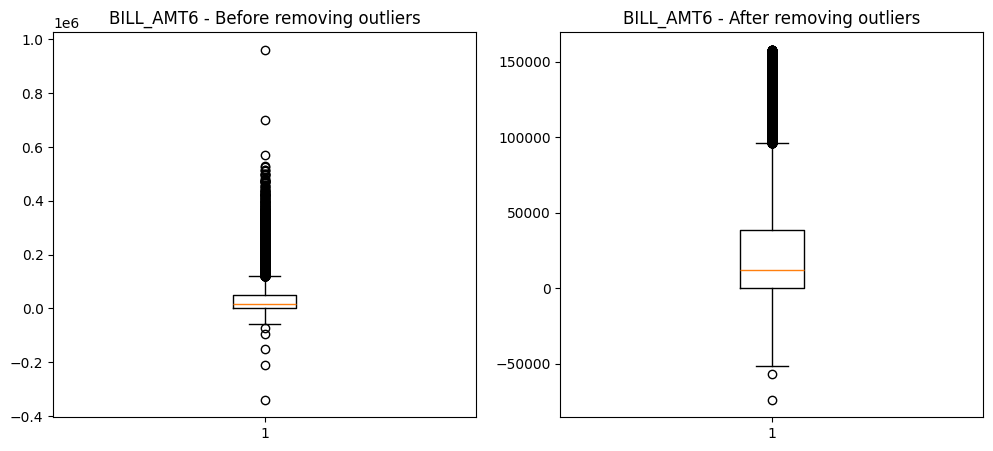

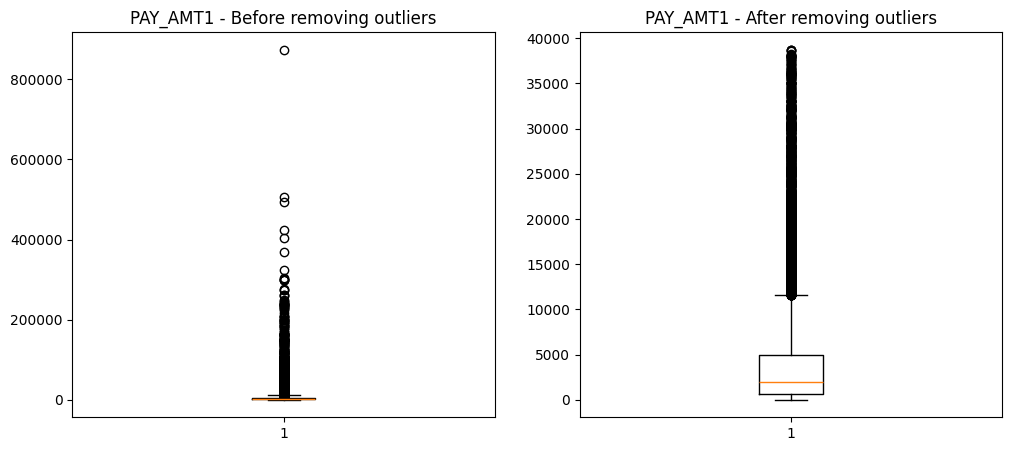

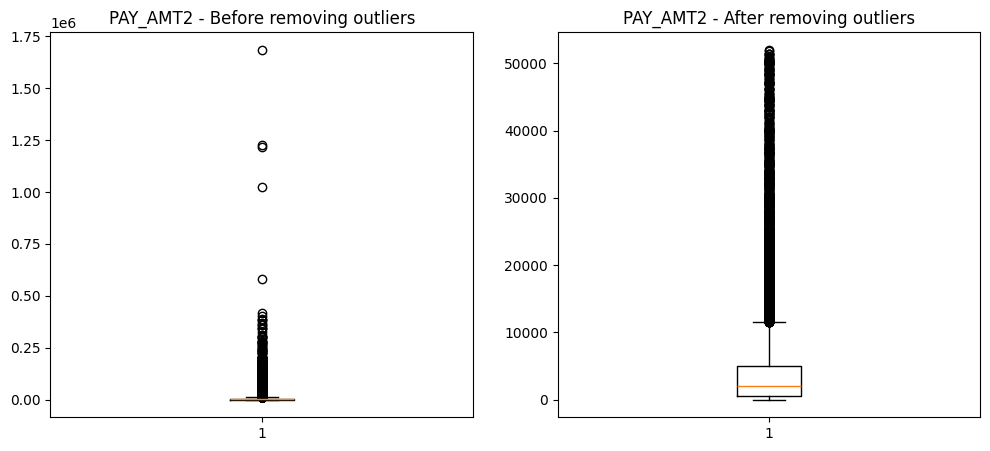

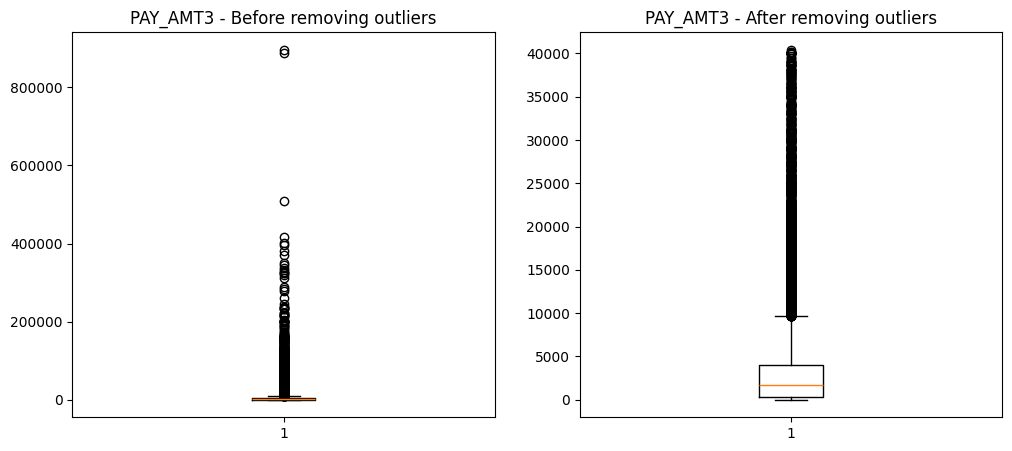

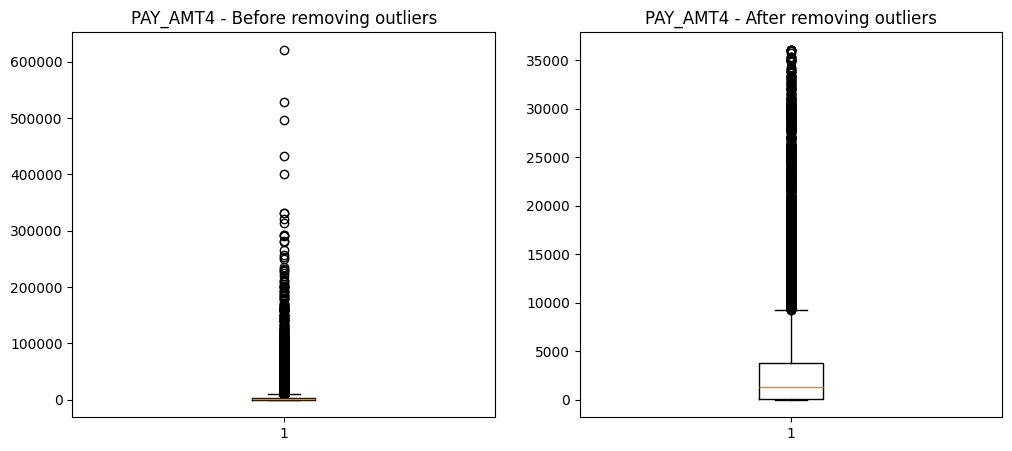

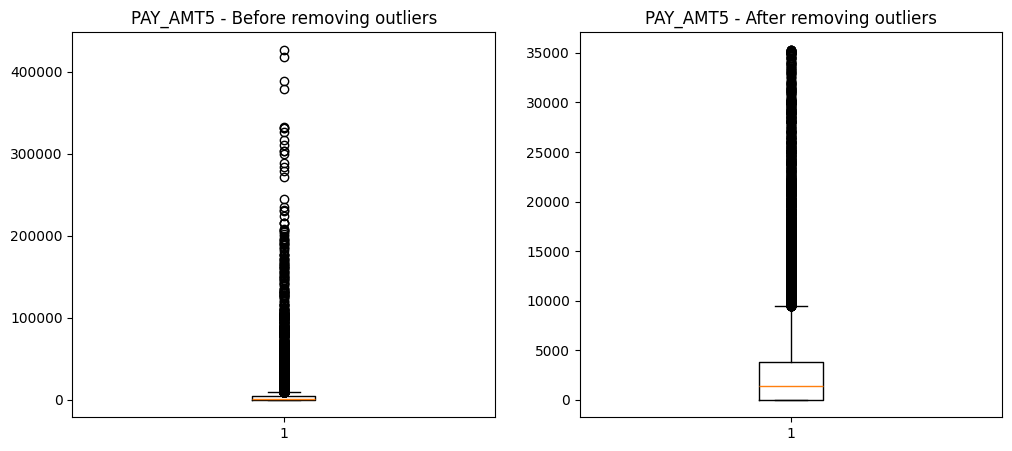

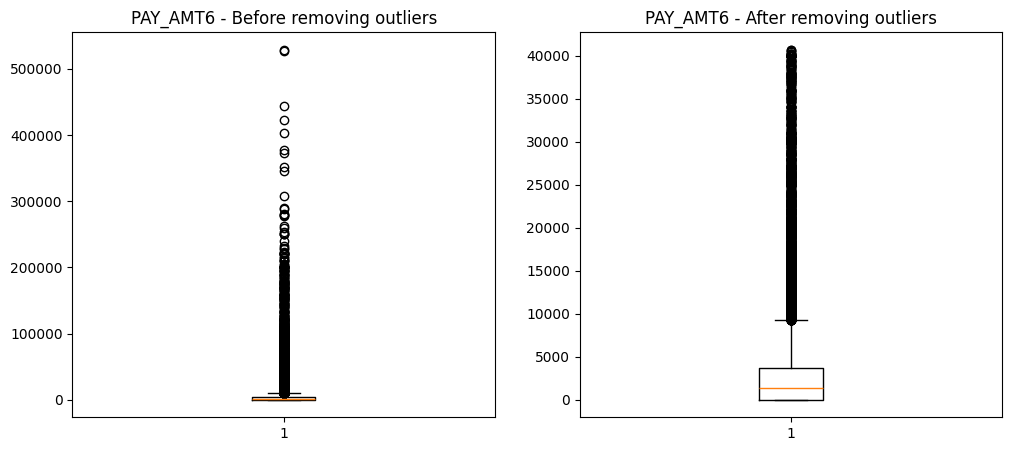

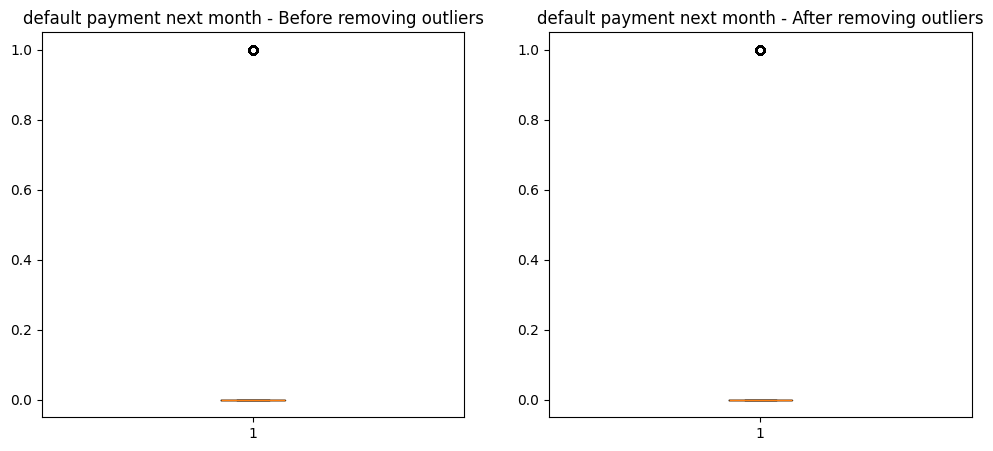

In [ ]:
for col in numerical_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Boxplot before removing outliers
    axes[0].boxplot(df[col])
    axes[0].set_title(f'{col} - Before removing outliers')

    # Boxplot after removing outliers
    axes[1].boxplot(new_df[col])
    axes[1].set_title(f'{col} - After removing outliers')

    plt.show()

In [ ]:
# Assuming 'target_column' is your label
X = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

print(X.shape, y.shape)  # Both should match


(30000, 23) (30000,)


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test , y_pred)

0.7991111111111111

In [ ]:
new_df = df.copy()  # keep original DataFrame structure
numerical_col = df.select_dtypes(include='number').columns.drop('default payment next month')

# Cap numeric columns using np.where
for col in numerical_col:
    q1 = np.quantile(new_df[col], 0.25)
    q3 = np.quantile(new_df[col], 0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    new_df[col] = np.where(
        new_df[col] > upper_limit,
        upper_limit,
        np.where(
            new_df[col] < lower_limit,
            lower_limit,
            new_df[col]
        )
    )


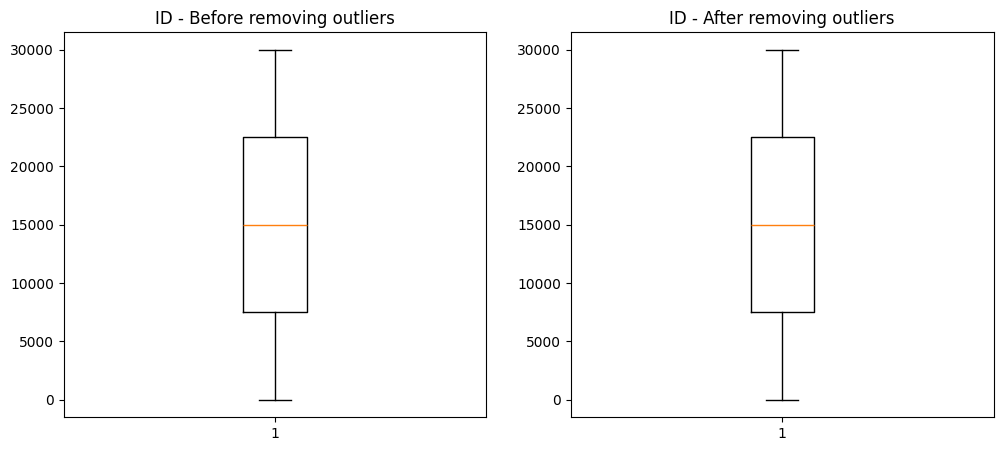

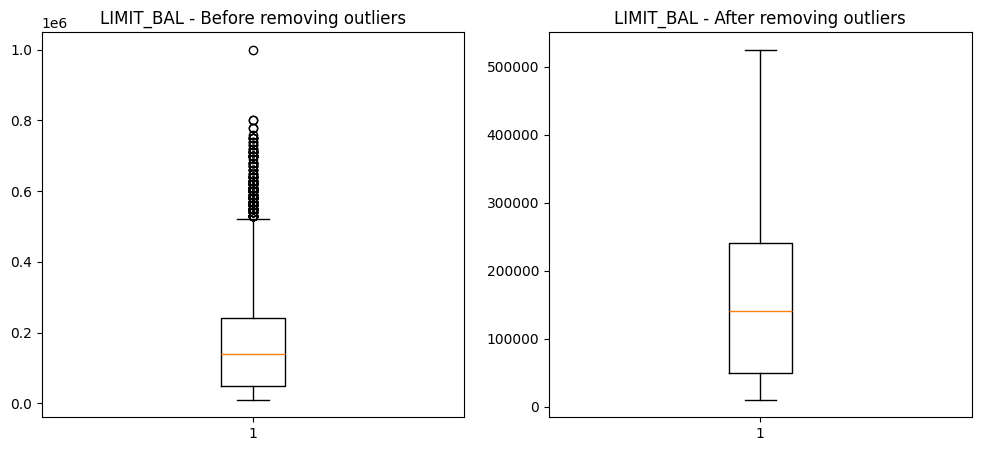

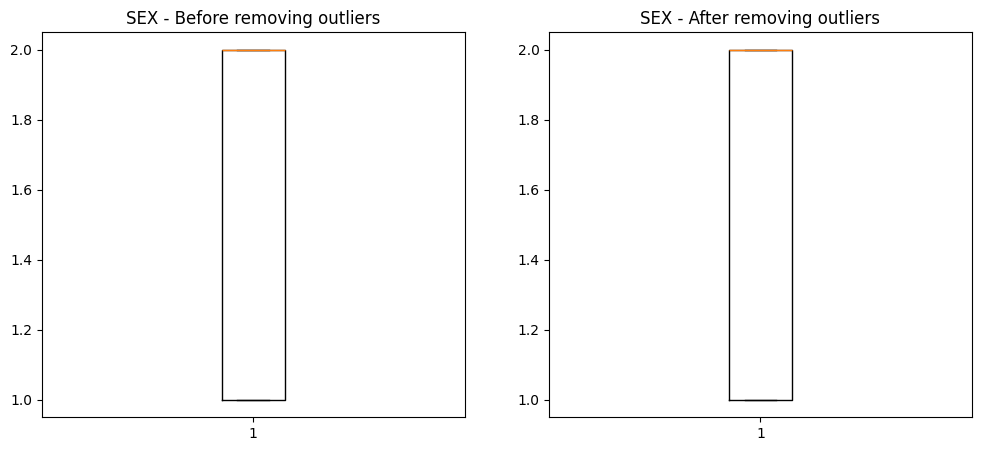

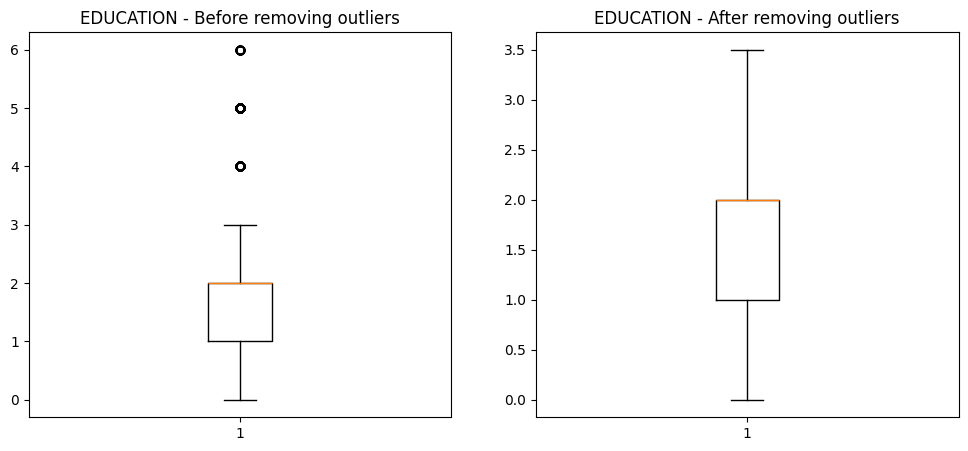

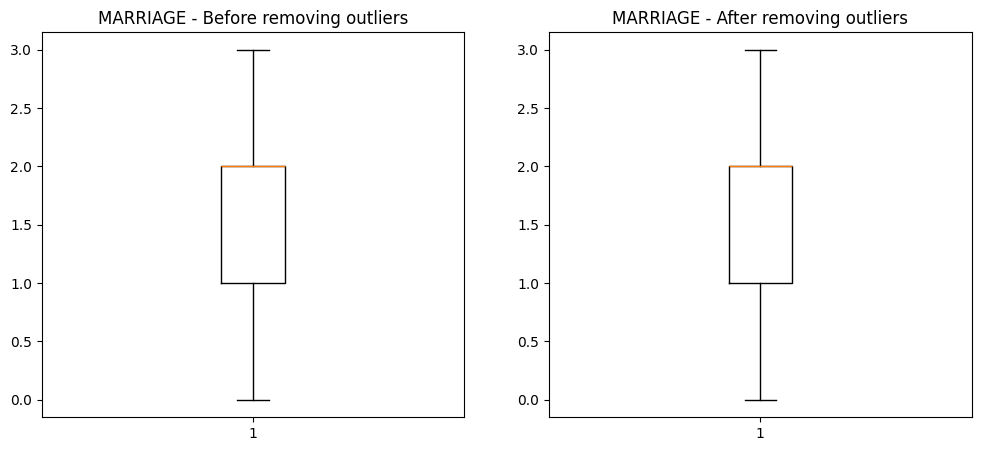

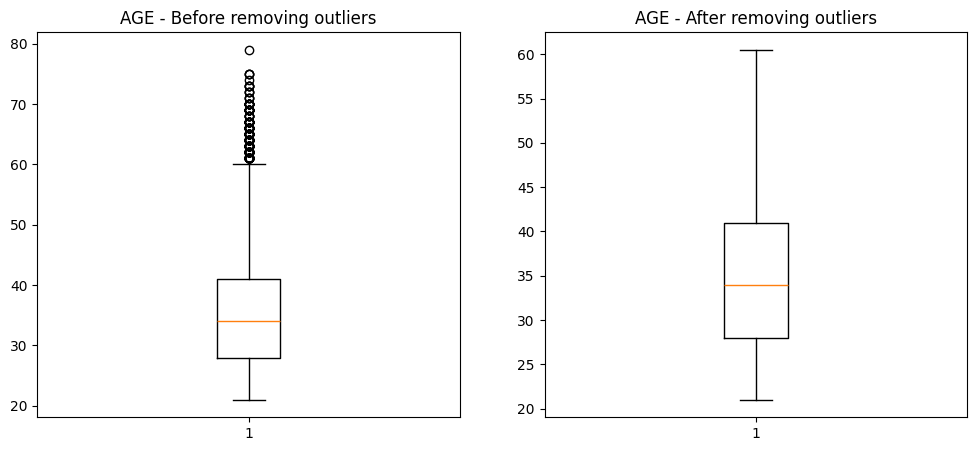

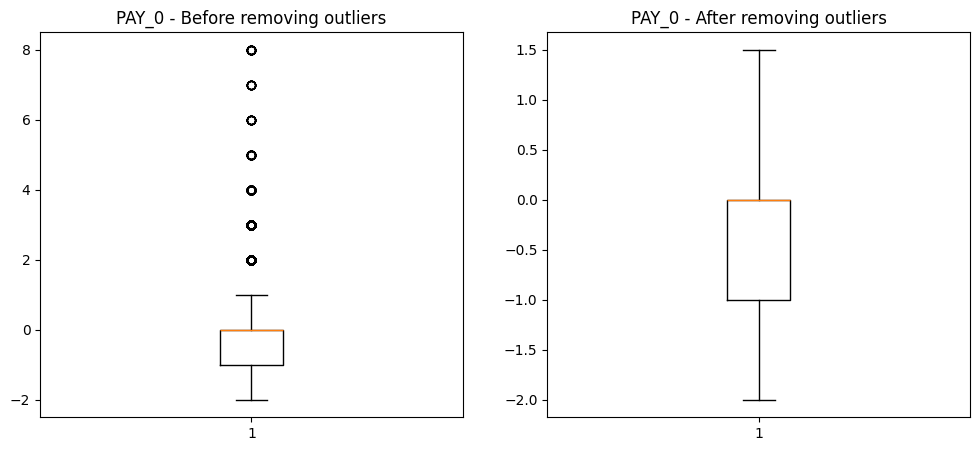

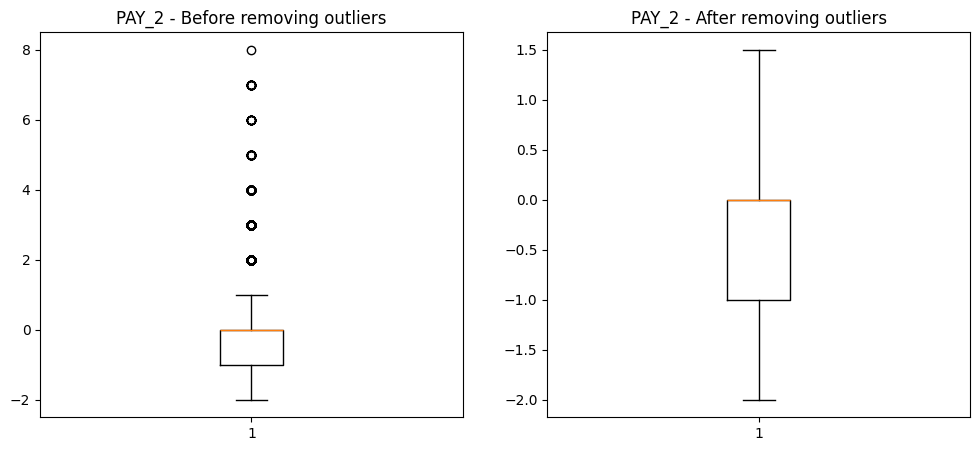

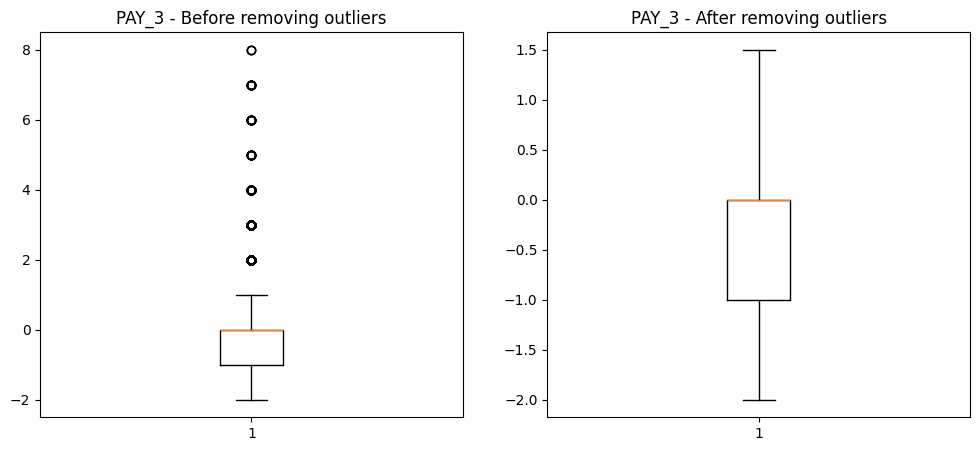

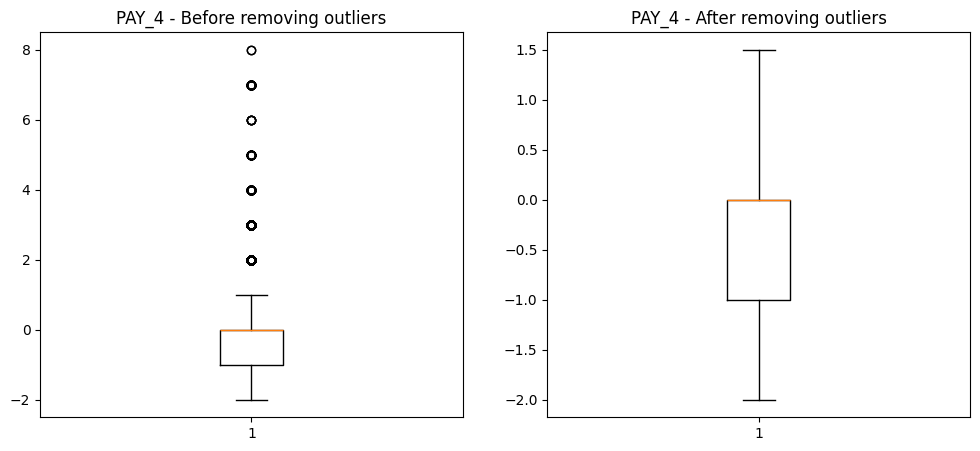

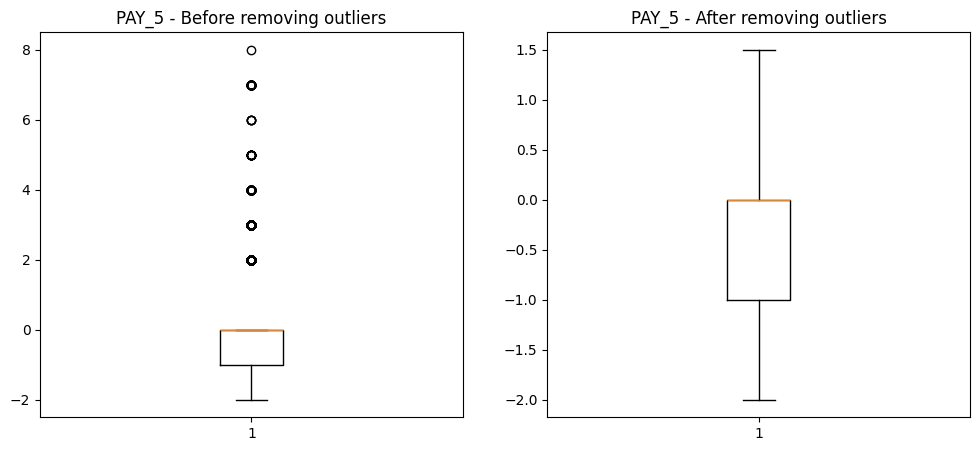

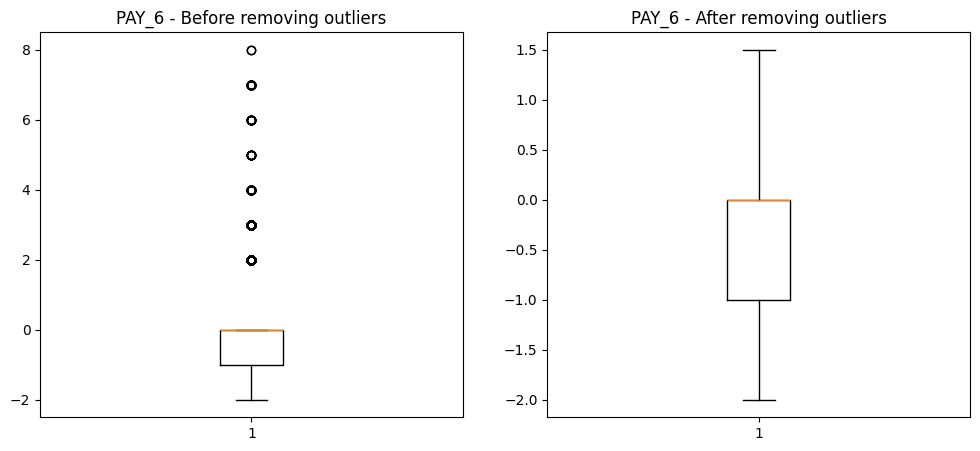

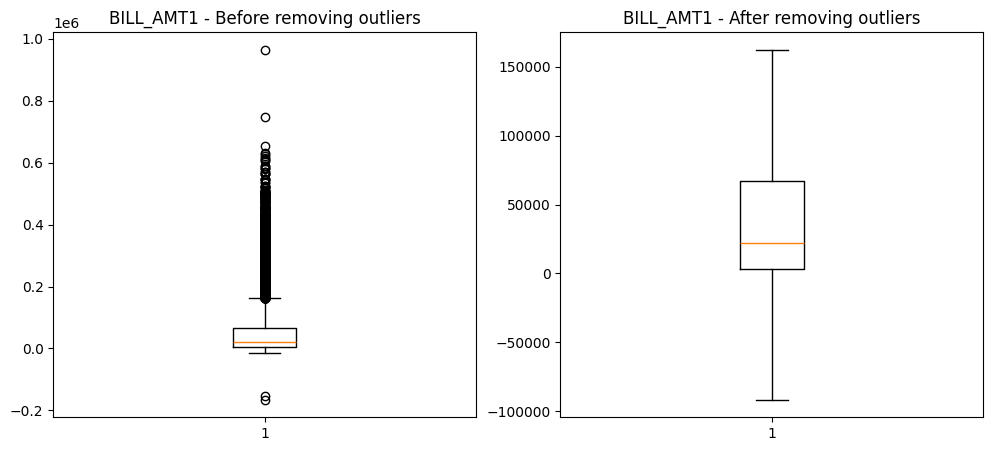

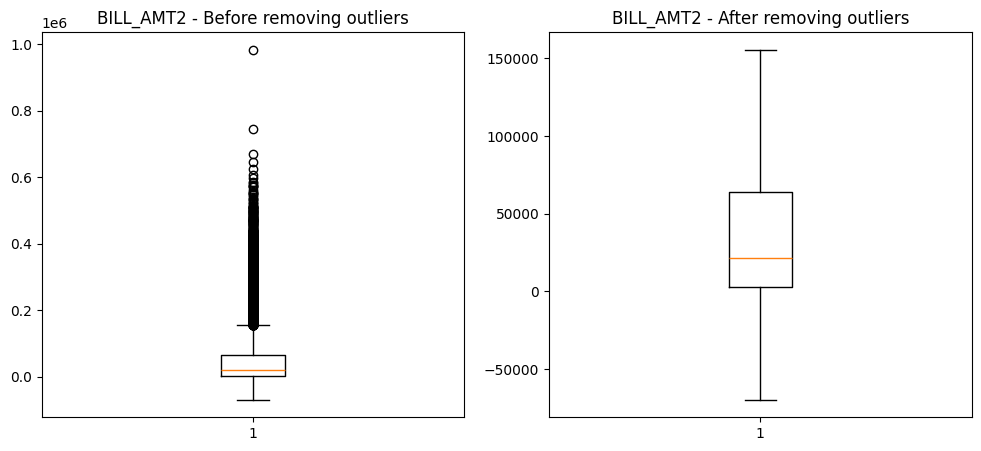

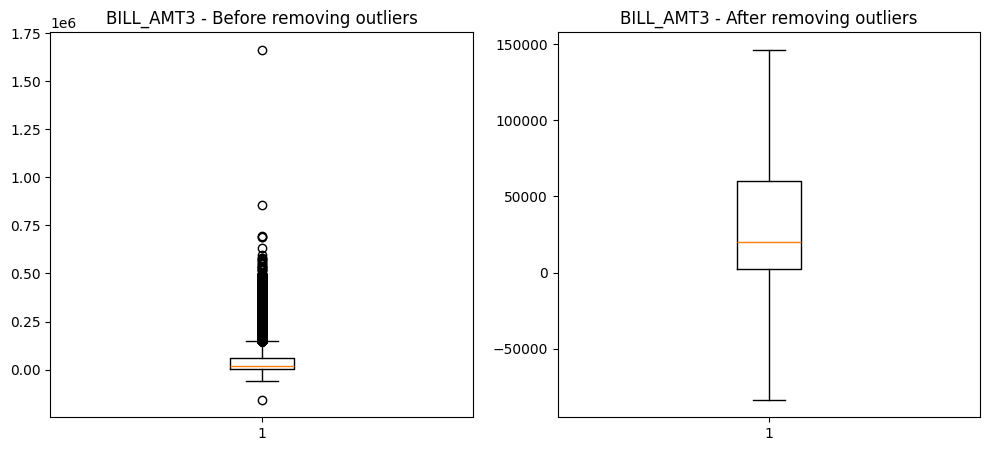

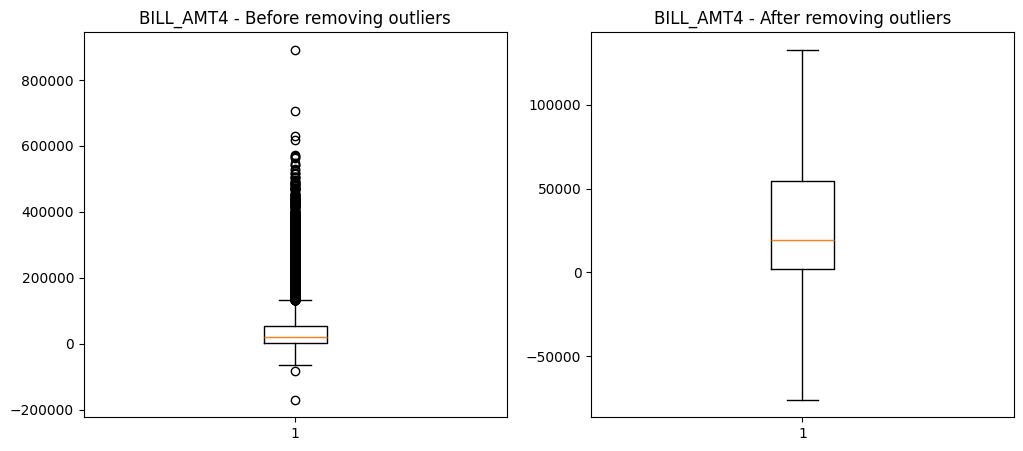

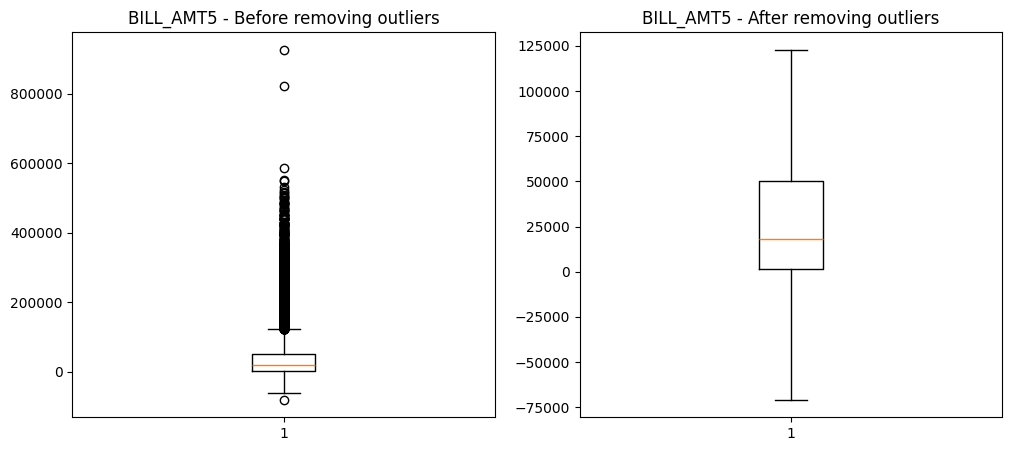

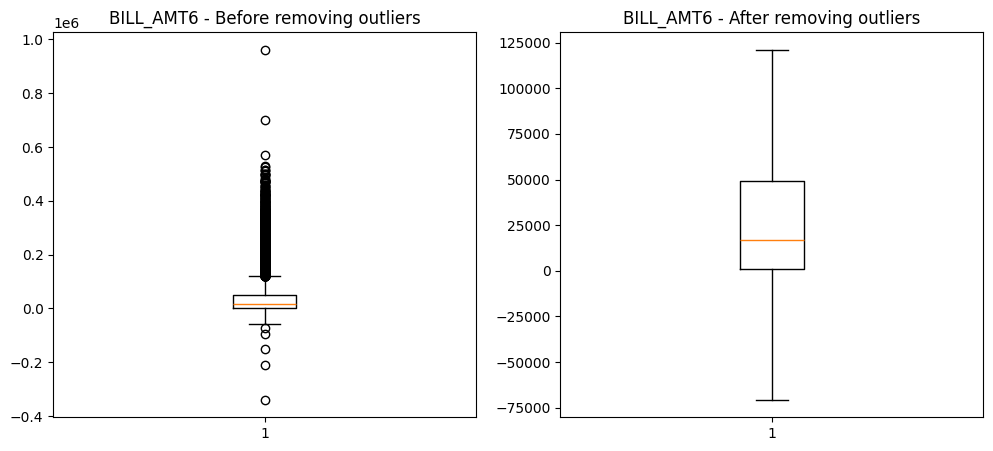

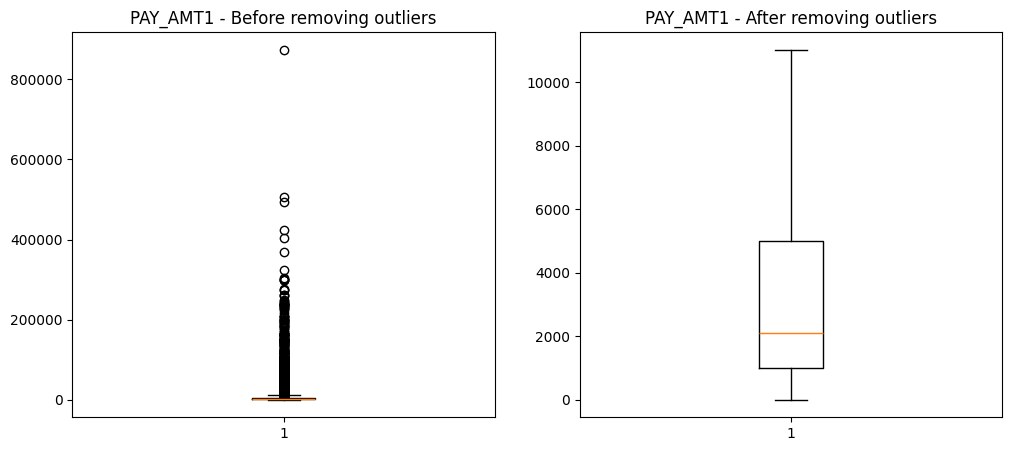

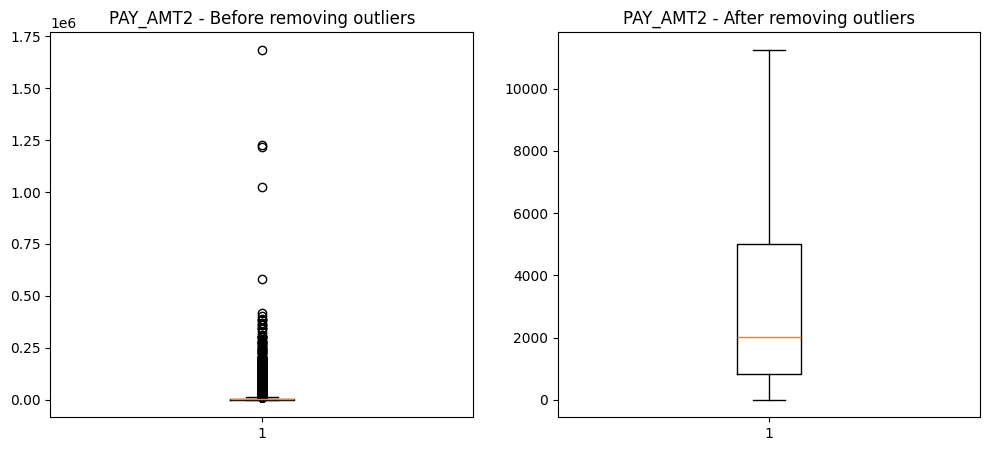

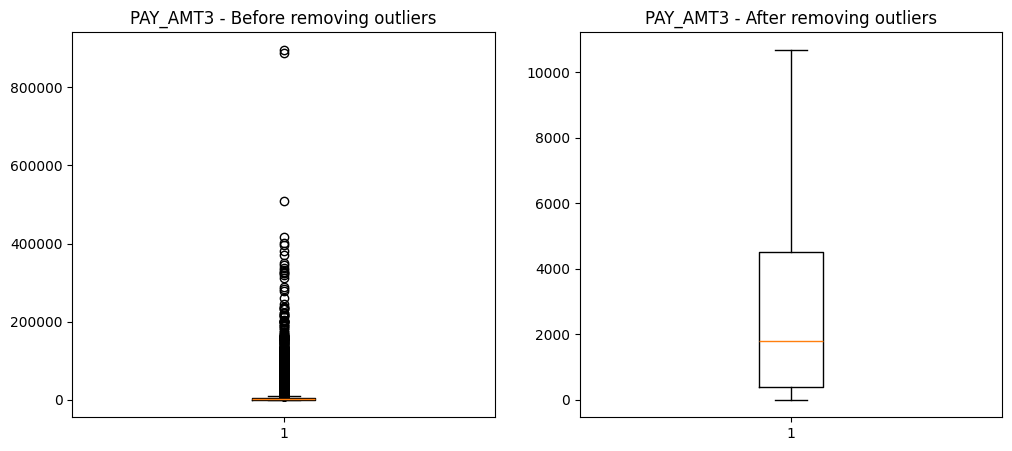

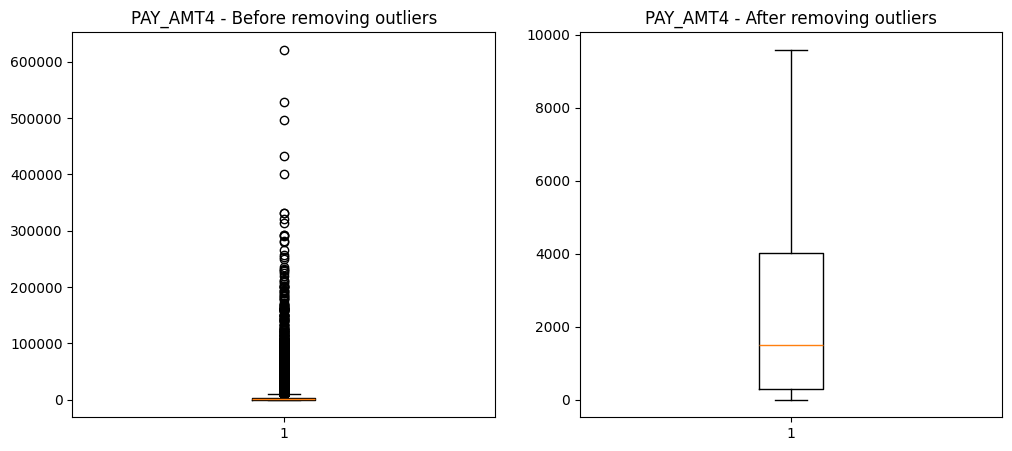

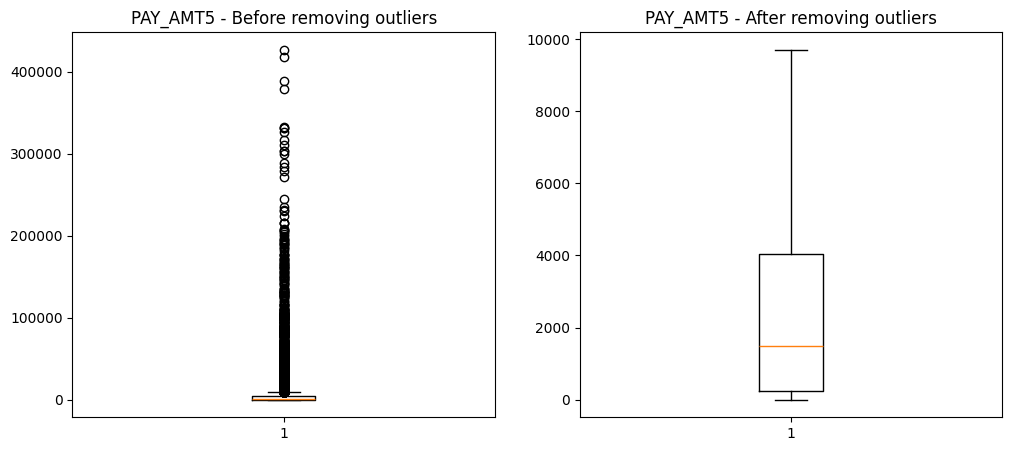

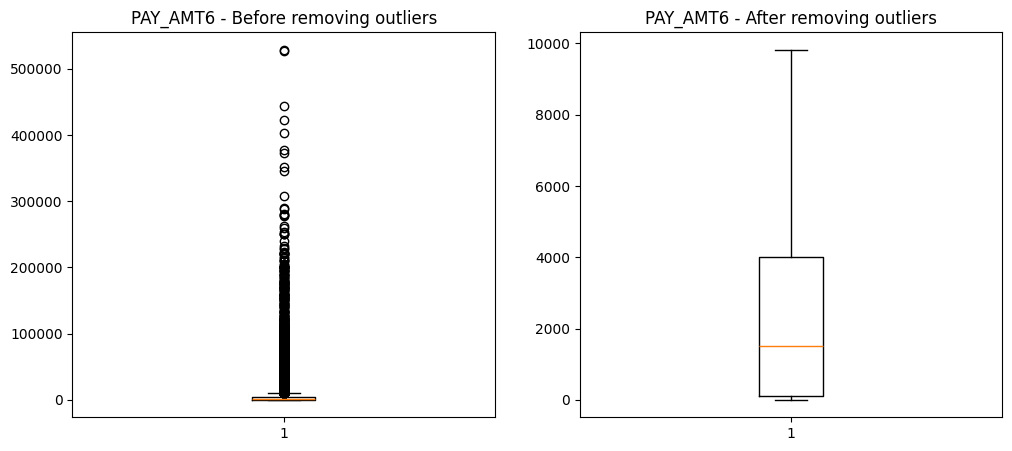

In [ ]:
for col in numerical_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Boxplot before removing outliers
    axes[0].boxplot(df[col])
    axes[0].set_title(f'{col} - Before removing outliers')

    # Boxplot after removing outliers
    axes[1].boxplot(new_df[col])
    axes[1].set_title(f'{col} - After removing outliers')

    plt.show()

In [ ]:
X = new_df.drop('default payment next month', axis=1)
y = new_df['default payment next month']

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.797

# 8. Feature Construction & Splitting

**Task:**

Create new features by combining existing ones (e.g., interaction terms, polynomial features). Split the dataset into training and testing sets, then evaluate model performance.


In [ ]:
df = pd.read_csv('/content/DelayedFlights.csv')

In [ ]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(subset=['ArrDelay'])
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
164403,2008,1,13,7,1316.0,1250,1401.0,1337,AQ,486,...,3.0,6.0,0.0,N,0.0,7.0,0.0,0.0,0.0,17.0
261484,2008,2,25,1,1412.0,1405,1626.0,1630,UA,734,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
144262,2008,1,20,7,1406.0,1359,1553.0,1540,9E,5876,...,7.0,36.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
264516,2008,2,9,6,728.0,700,810.0,739,UA,1207,...,4.0,11.0,0.0,N,0.0,28.0,0.0,3.0,0.0,0.0
317302,2008,2,1,5,1745.0,1630,1932.0,1835,MQ,4847,...,8.0,19.0,0.0,N,0.0,57.0,0.0,0.0,0.0,0.0
229742,2008,2,4,1,849.0,740,1029.0,854,YV,7209,...,3.0,28.0,0.0,N,0.0,95.0,0.0,0.0,0.0,0.0
240595,2008,2,1,5,1600.0,1535,1616.0,1543,OO,5836,...,8.0,25.0,0.0,N,0.0,0.0,0.0,33.0,0.0,0.0
173722,2008,1,31,4,1839.0,1830,2027.0,2023,CO,809,...,7.0,26.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
151679,2008,1,1,2,659.0,545,1029.0,855,AA,971,...,14.0,21.0,0.0,N,0.0,74.0,0.0,20.0,0.0,0.0
235232,2008,2,2,6,1710.0,1700,1840.0,1727,OH,4944,...,8.0,66.0,0.0,N,0.0,10.0,0.0,63.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352483 entries, 0 to 353909
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               352483 non-null  int64  
 1   Month              352483 non-null  int64  
 2   DayofMonth         352483 non-null  int64  
 3   DayOfWeek          352483 non-null  int64  
 4   DepTime            352483 non-null  float64
 5   CRSDepTime         352483 non-null  int64  
 6   ArrTime            352483 non-null  float64
 7   CRSArrTime         352483 non-null  int64  
 8   UniqueCarrier      352483 non-null  object 
 9   FlightNum          352483 non-null  int64  
 10  TailNum            352483 non-null  object 
 11  ActualElapsedTime  352483 non-null  float64
 12  CRSElapsedTime     352483 non-null  float64
 13  AirTime            352483 non-null  float64
 14  ArrDelay           352483 non-null  float64
 15  DepDelay           352483 non-null  float64
 16  Origin 

In [ ]:
X = df.drop(columns=['ArrDelay' , 'Origin' , 'Dest' , 'CancellationCode' , 'TailNum' , 'UniqueCarrier', ])
y = df['ArrDelay']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

transformer = ColumnTransformer([
    ('simpleImputer' , SimpleImputer(strategy='mean') , num_cols)
], remainder='passthrough')

In [ ]:
pipeline = Pipeline([
    ('transformer', transformer),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("R²:", r2_score(y_test, y_pred))

R²: 0.999999998400829
